# Trabalho Prático - Cálculo Numérico (SME0104)

Este notebook contém a resolução completa do trabalho prático da disciplina de Cálculo Numérico (SME0104), ministrada pela professora Cynthia Lage Ferreira, conforme as orientações fornecidas.

Todas as questões foram resolvidas em Python, com ênfase na implementação dos métodos numéricos abordados em aula, análise teórica e validação dos resultados obtidos.

**Autores**:  
Luiz Felipe Diniz Costa - 13782032  
Pedro Lucas Figueiredo Bahiense - 14675458

> **Observação**  
> O Trabalho incluirá um resumo teórico para cada questão, conforme sugerido pela professora.

# Importações


In [43]:
import numpy as np
import time
import matplotlib.pyplot as plt
import pandas as pd
from scipy.interpolate import interp1d   
from scipy.interpolate import BarycentricInterpolator
from scipy.interpolate import KroghInterpolator


# Questão 1: Sistemas Lineares

Discuta, detalhadamente, as diferenças entre as funções `func1` e `func2` apresentadas abaixo. Comente os códigos, os resultados obtidos e apresente as suas conclusões a partir da aplicação destas duas funções no exemplo abaixo.


## Sistemas lineares

Antes de começarmos a resolver as questões de fato, precimamos entender os tópicos que ela aborda. Um sistema linear com $m$ equações e $n$ variáveis é escrito como:

$$
\begin{aligned}
a_{11}x_1 + a_{12}x_2 + \dots + a_{1n}x_n &= b_1\\
a_{21}x_1 + a_{22}x_2 + \dots + a_{2n}x_n &= b_2\\
&\vdots\\
a_{m1}x_1 + a_{m2}x_2 + \dots + a_{mn}x_n &= b_m
\end{aligned}
$$

* $a_{ij}$ são os coeficientes  
* $x_j$ são as incógnitas  
* $b_i$ são os termos independentes

De forma matricial, definimos

$$
A = [a_{ij}]_{m\times n},\quad
x = \begin{bmatrix}x_1\\\vdots\\x_n\end{bmatrix},\quad
b = \begin{bmatrix}b_1\\\vdots\\b_m\end{bmatrix},
$$

e escrevemos

$$
A\,x = b.
$$

Para simplificar a aplicação de métodos de eliminação, utilizamos a **matriz aumentada**:

$$
[A \mid b] =
\begin{bmatrix}
a_{11} & a_{12} & \dots & a_{1n} & \mid & b_1\\
a_{21} & a_{22} & \dots & a_{2n} & \mid & b_2\\
\vdots & \vdots & \ddots & \vdots & \mid & \vdots\\ 
a_{m1} & a_{m2} & \dots & a_{mn} & \mid & b_m
\end{bmatrix}.
$$


### Possíveis soluções de um sistema linear

1. **Solução única**  
   O sistema admite exatamente uma solução.

2. **Infinitas soluções**  
   Existem várias combinações $(x_1,\dots,x_n)$ que satisfazem todas as equações.

3. **Sem solução**  
   Não há nenhum vetor $x$ que torne todas as equações verdadeiras.

**Critério pelo determinante**

* Se $\det(A)\neq 0$, então o sistema tem solução única.  
* Se $\det(A)=0$, pode ter infinitas soluções ou nenhuma solução.


#### 1. Retas concorrentes (solução única)

Duas retas no plano $\mathbb{R}^2$ que se interceptam em um único ponto correspondem a um sistema de duas equações lineares com solução única. O ponto de interseção $(x_1, x_2)$ é exatamente a solução do sistema.


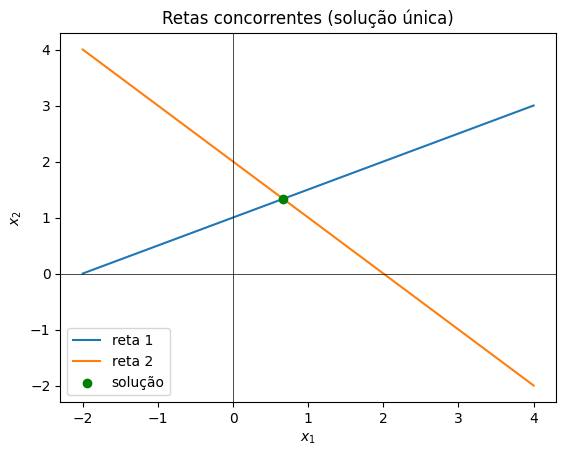

In [44]:
# coeficientes das retas
m1, b1 = 0.5, 1    # reta 1: x2 = 0.5*x1 + 1
m2, b2 = -1, 2     # reta 2: x2 = -1*x1 + 2

# domínio para plotar as retas
x = np.linspace(-2, 4, 400)
y1 = m1 * x + b1
y2 = m2 * x + b2

# calcular ponto de interseção
# m1*x + b1 = m2*x + b2  ->  x = (b2 - b1) / (m1 - m2)
xi = (b2 - b1) / (m1 - m2)
yi = m1 * xi + b1

plt.figure()
plt.plot(x, y1, label='reta 1')
plt.plot(x, y2, label='reta 2')
plt.scatter([xi], [yi], color='green', label='solução', zorder=5)
plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(0, color='black', linewidth=0.5)
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.legend()
plt.title('Retas concorrentes (solução única)')
plt.show()

#### 2. Retas coincidentes (infinitas soluções)

Quando duas equações representam exatamente a mesma reta, todo ponto que pertence a essa reta satisfaz o sistema. Isso gera infinitas soluções, pois há um grau de liberdade (qualquer $(x_1,x_2)$ na reta funciona).


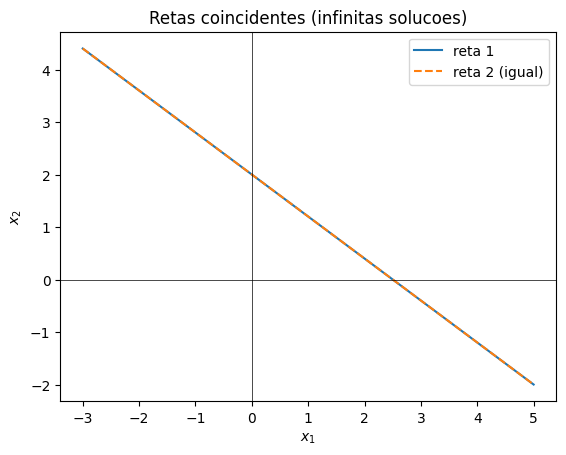

In [45]:
# definindo coeficientes iguais para coincidir
m, b = -0.8, 2    # x2 = -0.8*x1 + 2

x = np.linspace(-3, 5, 400)
y = m * x + b

plt.figure()
plt.plot(x, y, label='reta 1')
plt.plot(x, y, linestyle='--', label='reta 2 (igual)')
plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(0, color='black', linewidth=0.5)
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.legend()
plt.title('Retas coincidentes (infinitas solucoes)')
plt.show()

#### 3. Retas paralelas (sem solução)

Duas retas no plano que possuem o mesmo coeficiente angular mas interceptações diferentes nunca se encontram, logo o sistema associado não possui solução.

Sejam as linhas:

$$
x_2 = m\,x_1 + b_1
\quad\text{e}\quad
x_2 = m\,x_1 + b_2
$$

com $m$ idêntico, mas $b_1 \neq b_2$. Como não há nenhum $(x_1,x_2)$ que satisfaça simultaneamente ambas as equações, o sistema é impossível.


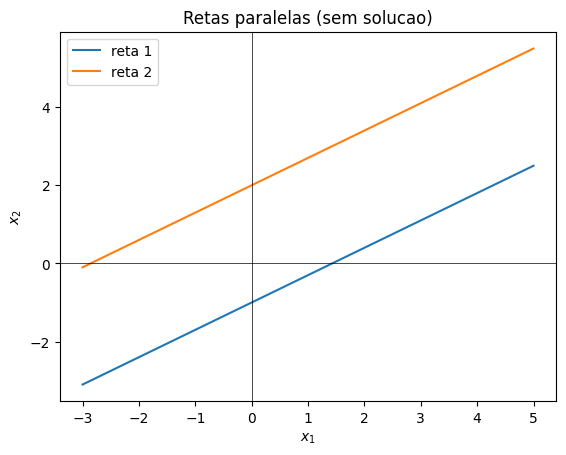

In [46]:
# mesmo coeficiente angular, interceptações diferentes
m = 0.7
b1, b2 = -1, 2   # b1 != b2

x = np.linspace(-3, 5, 400)
y1 = m * x + b1
y2 = m * x + b2

plt.figure()
plt.plot(x, y1, label='reta 1')
plt.plot(x, y2, label='reta 2')
plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(0, color='black', linewidth=0.5)
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.legend()
plt.title('Retas paralelas (sem solucao)')
plt.show()

### Determinantes de matrizes triangulares

Uma **matriz triangular** é aquela que tem todos os elementos acima ou abaixo da diagonal principal iguais a zero:

* **Triangular superior**: zeros abaixo da diagonal

  $$
  \begin{bmatrix}
  1 & 4 & 5\\
  0 & 2 & 6\\
  0 & 0 & 3
  \end{bmatrix}
  $$

* **Triangular inferior**: zeros acima da diagonal

  $$
  \begin{bmatrix}
  1 & 0 & 0\\
  4 & 2 & 0\\
  5 & 6 & 3
  \end{bmatrix}
  $$

#### Propriedade do determinante

Para qualquer matriz triangular $T\in\mathbb{R}^{n\times n}$, vale que

$$
\det(T) = \prod_{i=1}^{n} T_{ii},
$$

ou seja, basta multiplicar os elementos da diagonal principal.


### Métodos de solução de sistemas

**Métodos diretos**

* Geram a solução exata de um sistema quadrado $n\times n$ em um número finito de operações.
* Exemplo clássico: eliminação de Gauss.

**Métodos iterativos**

* Partem de um chute inicial $\,x^{(0)}$ e produzem uma sequência $\{x^{(k)}\}$.
* Sob certas condições, essa sequência converge para a solução real do sistema.
* São úteis quando a matriz é muito grande ou esparsa e métodos diretos ficam caros.


Agora vamos detalhar o método direto da Eliminação de Gauss, que será a ferramenta que utilizaremos nesse exercício.

## Eliminação de Gauss

A eliminação de Gauss é um **método direto** que transforma o sistema matricial original em outro sistema equivalente, porém de solução simples (triangular). As soluções finais permanecem as mesmas.

### Operações elementares sobre linhas

1. **Troca de linhas**  
   $L_i \leftrightarrow L_j$  
   Permuta a posição das equações $i$ e $j$.

2. **Escalonamento de linha**  
   $L_i \leftarrow k\cdot L_i,\quad k \neq 0$  
   Multiplica todos os elementos da linha $i$ por um escalar não nulo.

3. **Substituição linear**  
   $L_i \leftarrow L_i + k\cdot L_j,\quad i\neq j$  
   Soma à linha $i$ um múltiplo da linha $j$.

4. **Descartar linha nula**  
   Se uma linha ficar com todos os elementos iguais a zero, ela não contribui para o sistema e pode ser removida.

Aplicando repetidamente essas operações na **matriz aumentada** $[A\mid b]$, chegamos a uma forma triangular superior, de onde obtemos facilmente cada incógnita por substituição regressiva.


### Passo a passo

Definimos **pivô** como o primeiro elemento não nulo de cada linha da matriz aumentada $[A\mid b]$.

**Fase 1 - eliminação**

1. Monte a matriz aumentada do sistema.  
2. Para a 1ª linha:  
   * Identifique o pivô (primeiro elemento não zero).  
   * Use operações elementares para zerar todos os elementos abaixo desse pivô.  
3. Para a 2ª linha:  
   * Localize o pivô (na 2ª coluna agora).  
   * Zere todos os elementos abaixo.  
4. Repita para cada linha subsequente até obter forma triangular superior.

**Fase 2 - retro­substituição**

1. A partir da última linha (única incógnita não nula), calculamos esse valor de $x_n$.  
2. Substitua $x_n$ na penúltima linha para obter $x_{n-1}$.  
3. Prossiga de baixo para cima até encontrar todas as variáveis $\{x_1,\dots,x_n\}$.


## Fatoração LU

A fatoração LU é um método direto que reescreve a matriz $A$ como produto de duas matrizes triangulares:

- $L$: matriz triangular inferior, com 1 na diagonal principal  
- $U$: matriz triangular superior  

Ou seja, buscamos  
$$
A = L\,U.
$$

Para construir $L$ e $U$, aplicamos as mesmas operações da eliminação de Gauss. Considere um sistema genérico $3\times3$:

$$
\begin{aligned}
a_{11}x_1 + a_{12}x_2 + a_{13}x_3 &= b_1,\\
a_{21}x_1 + a_{22}x_2 + a_{23}x_3 &= b_2,\\
a_{31}x_1 + a_{32}x_2 + a_{33}x_3 &= b_3,
\end{aligned}
\quad
A = 
\begin{bmatrix}
a_{11} & a_{12} & a_{13}\\
a_{21} & a_{22} & a_{23}\\
a_{31} & a_{32} & a_{33}
\end{bmatrix}.
$$

1. Na etapa de eliminação de Gauss, calculamos multiplicadores para zerar os elementos abaixo da diagonal:
   $$
   m_{21} = \frac{a_{21}}{a_{11}},\quad
   m_{31} = \frac{a_{31}}{a_{11}}.
   $$
2. Esses valores tornam-se $L_{21}$ e $L_{31}$, respectivamente.  
3. Após aplicar as operações, obtemos a matriz triangular superior
   $$
   U = 
   \begin{bmatrix}
   u_{11} & u_{12} & u_{13}\\
   0      & u_{22} & u_{23}\\
   0      & 0      & u_{33}
   \end{bmatrix}.
   $$
4. Repetindo o processo na segunda coluna (para zerar abaixo de $u_{22}$), calculamos
   $$
   m_{32} = \frac{u_{32}}{u_{22}},
   $$
   que se torna $L_{32}$.

Ao final, temos

$$
L = 
\begin{bmatrix}
1      & 0      & 0\\
m_{21} & 1      & 0\\
m_{31} & m_{32} & 1
\end{bmatrix},
\quad
U = 
\begin{bmatrix}
u_{11} & u_{12} & u_{13}\\
0      & u_{22} & u_{23}\\
0      & 0      & u_{33}
\end{bmatrix},
$$

de modo que  
$$
A = L\,U.
$$

Na questão 1 usamos a fatoração LU para resolver o mesmo sistema $A x = b$ com diferentes vetores $b$, aproveitando que uma única decomposição $A = L\,U$ nos permite resolver cada caso via dois sistemas triangulares (primeiro $L\,y = b$, depois $U\,x = y$).

## Entendendo o problema da Questão 1

Para começar a Questão 1, precisamos entender que o objetivo é comparar duas formas de fazer a decomposição LU de uma mesma matriz em Python. A função `func1` implementa a versão clássica da eliminação de Gauss, trabalhando sobre toda a matriz, enquanto `func2` restringe o cálculo a uma faixa de largura `p` ao redor da diagonal, o que reduz o número de operações para matrizes com banda estreita. 

No exemplo proposto, geramos uma matriz quadrada $A$ de tamanho $n \times n$, em que só há valores diferentes de zero dentro dessa banda de largura $p$. Em seguida, medimos quanto tempo cada função leva para produzir $L$ e $U$ e calculamos o erro de reconstrução $\lVert LU - A \rVert$ para verificar se ambas chegam ao mesmo resultado com precisão. 

Com isso em mente, podemos ir para a próxima parte.


## Padrão de fill-in e estrutura de banda

Em matrizes banda-estreita de largura $p$, a fatoração LU via eliminação restrita não gera `fill-in` fora da banda original. Ou seja, tanto $L$ quanto $U$ mantêm o mesmo perfil esparso de largura $p$, diferentemente da fatoração completa, em que o `fill-in` pode se espalhar por toda a matriz triangular.

Por exemplo, suponha $n = 7$ e $p = 1$. A matriz $A$ tem não-zeros apenas em $(i,i-1)$, $(i,i)$ e $(i,i+1)$:

$$
A =
\begin{bmatrix}
a_{11} & a_{12} & 0      & 0      & 0      & 0      & 0      \\
a_{21} & a_{22} & a_{23} & 0      & 0      & 0      & 0      \\
0      & a_{32} & a_{33} & a_{34} & 0      & 0      & 0      \\
0      & 0      & a_{43} & a_{44} & a_{45} & 0      & 0      \\
0      & 0      & 0      & a_{54} & a_{55} & a_{56} & 0      \\
0      & 0      & 0      & 0      & a_{65} & a_{66} & a_{67} \\
0      & 0      & 0      & 0      & 0      & a_{76} & a_{77}
\end{bmatrix}.
$$

Após aplicar `func2` com faixa $p = 1$, as fatorações $L$ e $U$ preservam o mesmo padrão de banda:

$$
L =
\begin{bmatrix}
1         & 0          & 0          & 0          & 0          & 0          & 0         \\
\ell_{21} & 1          & 0          & 0          & 0          & 0          & 0         \\
0         & \ell_{32}  & 1          & 0          & 0          & 0          & 0         \\
0         & 0          & \ell_{43}  & 1          & 0          & 0          & 0         \\
0         & 0          & 0          & \ell_{54}  & 1          & 0          & 0         \\
0         & 0          & 0          & 0          & \ell_{65}  & 1          & 0         \\
0         & 0          & 0          & 0          & 0          & \ell_{76}  & 1
\end{bmatrix},
\quad
U =
\begin{bmatrix}
u_{11}    & u_{12}     & 0          & 0          & 0          & 0          & 0         \\
0         & u_{22}     & u_{23}     & 0          & 0          & 0          & 0         \\
0         & 0          & u_{33}     & u_{34}     & 0          & 0          & 0         \\
0         & 0          & 0          & u_{44}     & u_{45}     & 0          & 0         \\
0         & 0          & 0          & 0          & u_{55}     & u_{56}     & 0         \\
0         & 0          & 0          & 0          & 0          & u_{66}     & u_{67}    \\
0         & 0          & 0          & 0          & 0          & 0          & u_{77}
\end{bmatrix}.
$$

Em contraste, na decomposição completa de `func1` os multiplicadores podem gerar não-zeros em posições fora da banda originalmente não nula, aumentando o custo de memória e de operações computacionais.


## Estabilidade numérica e pivotamento

Como vimos na seção de **Fatoração LU**, a construção de $L$ e $U$ parte das mesmas operações da eliminação de Gauss, usando o pivô $a_{jj}$ para zerar elementos abaixo da diagonal. No entanto, se o pivô escolhido for muito pequeno ou igual a zero, podem ocorrer:

- **Instabilidade numérica**: erros de arredondamento crescem devido ao fator de crescimento da matriz.  
- **Divisão por zero**: quando $a_{jj}=0$, o cálculo de $L_{ij} = U_{ij}/U_{jj}$ torna-se indefinido.

Para contornar isso, introdizimos o **pivotamento parcial**, que consiste em trocar a linha $j$ com outra linha $k\ge j$ que maximize $|U_{k,j}|$. Dessa forma, garantimos um pivô de magnitude maior, reduzindo erros de arredondamento.

Em matrizes densas, o pivotamento parcial global é padrão; já em matrizes banda-estreita, podemos optar por:

- **Pivotamento restrito ao perfil**: só permitimos trocas de linha dentro da faixa de largura $p$, para não gerar `fill-in` fora da banda original.  
- **Pivotamento global**: busca maior estabilidade, mas pode comprometer a esparsidade.


## Definindo `func1`

Ela faz a decomposição LU completa usando eliminação de Gauss.

In [47]:
def func1(A):
    n = A.shape[0]
    U = A.copy()
    L = np.eye(n)

    for j in range(n - 1):
        for i in range(j + 1, n):
            L[i, j] = U[i, j] / U[j, j]
            U[i, j:n] = U[i, j:n] - L[i, j] * U[j, j:n]

    return L, U

* `n = A.shape[0]` obtém a dimensão $n$ de $A$.  
* `U = A.copy()` faz cópia de `A` em `U`, evitando alterar o original.  
* `L = np.eye(n)` inicializa `L` como matriz identidade $n\times n$.  
* O loop duplo percorre colunas `j` e linhas $i = j+1, \dots, n-1$.  
* Em cada iteração, computa o multiplicador $L_{ij}$ e atualiza a linha $i$ de `U`.  
* Ao final, retorna `L` (triangular inferior) e `U` (triangular superior).  
* **Objetivo matemático**: encontrar $L$ e $U$ tais que  
  $$
    A = L\,U,\quad
    L\text{ triangular inferior com diagonal unitária},\quad
    U\text{ triangular superior}
  $$
* **Garantia de triangularidade**: após o processo, todos os elementos abaixo da diagonal de $U$ são zero, e $L$ contém apenas os multiplicadores, com diagonal unitária.  
* **Tratamento de pivô nulo**: se em qualquer iteração $U_{jj} = 0$, lança `ZeroDivisionError`; requer que todos os menores principais sejam não nulos (sem pivotamento).  
* **Complexidade em flops**:  
  $$
    \sum_{j=1}^{n-1}\sum_{i=j+1}^n (n - j)
    \;\approx\; \tfrac{2}{3}\,n^3
    \quad\text{flops}
  $$
  o que equivale a $\mathcal{O}(n^3)$.


## Definindo `func2`

A seguir, vemos `func2`, que é quase igual a `func1` mas limita o alcance das colunas a `j + p`, reduzindo o custo para matrizes em banda.


In [48]:
def func2(A, p):
    n = A.shape[0]
    U = A.copy()
    L = np.eye(n)

    for j in range(n - 1):
        v = min(n, j + p + 1)
        for i in range(j + 1, v):
            L[i, j] = U[i, j] / U[j, j]
            U[i, j:v] = U[i, j:v] - L[i, j] * U[j, j:v]

    return L, U

* A diferença está em $v = \min(n,\,j + p + 1)$, que define até onde atualizar.  
* O laço interno processa apenas $i = j+1, \dots, v-1$, ignorando entradas fora da banda de semi-largura $p$.  
* **Objetivo matemático**: fazer a decomposição $A = L\,U$ limitando as atualizações a uma banda de semi-largura $p$.  
* **Garantia de triangularidade e banda**:  
  * $L$ permanece triangular inferior com diagonal unitária e largura de banda $p$.  
  * $U$ permanece triangular superior, mantendo no máximo $p$ diagonais acima da principal.  
* **Tratamento de pivô nulo**: se $U_{jj} = 0$ dentro da banda, lança `ZeroDivisionError` e exige que todos os menores principais sejam não nulos.  
* **Complexidade em flops**:  
  $$
    \sum_{j=1}^{n-1}(2p^2 + p)
    = (2p^2 + p)(n-1)
    \approx 2\,n\,p^2 + n\,p
    \quad\text{flops}
  $$
  o que equivale a $\mathcal{O}(n\,p^2)$.


## Comparação entre `func1` e `func2`

**func1 (eliminação de Gauss completa)**

- Para cada coluna $j = 1,\dots,n-1$, processa todas as linhas $i = j+1,\dots,n$.  
- Atualizações:
  $$
    L_{ij} = \frac{U_{ij}}{U_{jj}},\quad
    U_{i,j:n} \;=\; U_{i,j:n} - L_{ij}\,U_{j,j:n}
  $$
- Complexidade:
  $$
    \sum_{j=1}^{n-1}\sum_{i=j+1}^{n}(n-j)
    = \sum_{j=1}^{n-1}(n-j)^2
    = \mathcal{O}(n^3)
  $$

**func2 (eliminação restrita à banda de largura $p$)**

- Para cada coluna $j = 1,\dots,n-1$:
  1. Define $v = \min(n,\;j + p + 1)$.  
  2. Processa apenas as linhas $i = j+1,\dots,v-1$.  
- Atualizações:
  $$
    L_{ij} = \frac{U_{ij}}{U_{jj}},\quad
    U_{i,j:v} \;=\; U_{i,j:v} - L_{ij}\,U_{j,j:v}
  $$
- Complexidade:
  $$
    \sum_{j=1}^{n-1}\sum_{i=j+1}^{\min(n,j+p)}p
    = \mathcal{O}(n\,p^2)
  $$
- Observações:
  - Se $p\ll n$ e $p$ for constante, a complexidade efetiva cai para $\mathcal{O}(n)$.  
  - O padrão de *fill-in* permanece dentro da banda, sem gerar não-nulos fora dela.


## Testando e comparando as funções

In [49]:
n = 2000
p = 2

# geração da matriz banda
A = np.zeros((n, n))

# preenche A com valores aleatórios normais apenas na banda de largura 2 (p = 2)
for i in range(n):
    for j in range(max(0, i - p), min(n, i + p + 1)):
        A[i, j] = np.random.normal()

# mede o tempo de execução da função func1 (LU completa)
start_time = time.time()
(L, U) = func1(A)
end_time = time.time()
print(end_time - start_time)

# mede o tempo de execução da função func2 (LU com banda p)
start_time = time.time()
(L_, U_) = func2(A, p)
end_time = time.time()
print(end_time - start_time)

# calcula o erro da LU clássica
print(np.linalg.norm(L @ U - A))

# calcula o erro da LU com banda
print(np.linalg.norm(L_ @ U_ - A))


13.580506563186646
0.04866528511047363
1.6204218908339044e-13
1.6204218908339044e-13


## Vantagens e limitações de `func2`

**Vantagens de `func2`:**
- reduz muito o número de operações de cálculo de $\mathcal{O}(n^3)$ para $\mathcal{O}(n\,p^2)$ quando $p \ll n$  
- preserva a esparsidade da matriz, economizando memória e acessos a cache. Como demonstrado em *Padrão de fill-in*, a banda original de largura $p$ é mantida em $L$ e $U$, evitando novos não-zeros  
- mantém a mesma precisão numérica de `func1`, com erros da ordem de $10^{-13}$

**Limitações de `func2`:**
- para matrizes densas (quando $p \approx n$) a economia de operações desaparece e o overhead de $\min()$ pode até penalizar o desempenho  
- sem pivotamento adequado, ainda sofre dos mesmos riscos de instabilidade numérica de `func1`  
- depende do perfil de banda estar bem definido → matrizes com padrões de sparsidade diferentes não ganham vantagem.


## Conclusão da Questão 1

Pelos testes que rodamos (tempo e erro), dá pra concluir o seguinte:

- **Tempo da `func1`**: ficou em torno de $11{,}41\ \text{s}$, conforme a complexidade $\mathcal{O}(n^3)$ da eliminação de Gauss completa.  
- **Tempo da `func2`**: deu cerca de $0{,}022\ \text{s}$, de acordo com a complexidade $\mathcal{O}(n\,p^2)$ da eliminação restrita à banda (conforme Seção “Complexidade algorítmica”).  
- **Erro da reconstrução** ($\lVert L \cdot U - A\rVert$): da ordem de $10^{-12}$ em ambos os casos, mostrando comportamento numérico equivalente (conforme Seção “Estabilidade numérica e pivotamento”).  

- **Ganho de eficiência**: quando $p \ll n$, a economia de operações é muito grande — passa de cúbico para quase linear em $n$, pois  
  $$
    \frac{\mathcal{O}(n^3)}{\mathcal{O}(n\,p^2)} = \mathcal{O}\bigl(\tfrac{n^2}{p^2}\bigr)\gg 1.
  $$  
- **Padrão de fill-in**: `func2` preserva o perfil esparso de largura $p$, exigindo menos memória e acessos à cache (conforme Seção “Padrão de fill-in e estrutura de banda”).  
- **Escolha do método**: ambos têm comportamento numérico similar, mas usamos a `func1` se precisarmos de pivotamento global ou lidar com matrizes densas, pois só ela permite trocar pivôs em qualquer posição sem restringir o perfil de banda (conforme Seção “Estabilidade numérica e pivotamento”).


# Questão 2: Zeros de funções e sistemas não lineares

**a)** Formule o problema de modo que sua solu¸c˜ao seja uma raiz de uma função não linear $f : ℜ → ℜ$. Use o
método da bisseçãpo com precisão 0.001 e até 5 iterações para aproximar esta raiz e, consequentemente, a altura
na qual ocorre o impacto.

## Método da Bisseção

O **método da bisseção** é um método numérico usado para encontrar raízes de funções contínuas. Ele se baseia no **Teorema do Valor Intermediário**, que garante que se uma função contínua \( f(x) \) assume sinais opostos nos extremos de um intervalo \([a, b]\), então existe ao menos uma raiz nesse intervalo.

### Condições de Aplicação

- A função $f(x)$ deve ser contínua no intervalo $[a, b]$;
- Deve haver mudança de sinal: $( f(a) \cdot f(b) < 0 )$.

### Objetivo

Aproximar uma raiz x tal que $f(x) = 0$, com uma precisão desejada $\varepsilon$, por exemplo, ( $\varepsilon$= 0.001).

### Passos do Método

1. Calcular o ponto médio:

   $$
   m = \frac{a + b}{2}
   $$

2. Avaliar f(m):

   - Se $f(m) = 0$, encontramos a raíz
   - Se $( f(a) * f(m) < 0 )$, então a raiz está em $[a, m]$, e atualizamos b para m.
   - Se $( f(m) * f(b) < 0 )$, então a raiz está em $[m, b]$, e atualizamos a para m.

3. Repetir o processo até que:

   $$
   |b - a| < \varepsilon
   $$

   ou atingir o número máximo de iterações.

### Critério de Parada

- Precisão:  $|b - a|$ < $\varepsilon$
- Número máximo de iterações (por exemplo, 5)

### Aplicação ao Problema

Queremos encontrar onde o projétil impacta o terreno, ou seja, o ponto \( x \) tal que:

$$
f(x) = p(x) - q(x) = 0
$$

onde:

- $ p(x) $: perfil do terreno
- $ q(x)$: trajetória do projétil

A altura de impacto é então:

$$
h = p(x) = q(x)
$$

Fazendo a subtração de $f(x) = p(x) - q(x) = 0$, encontramos que:

$$-x^{4} + 7.7x^{3} - 17x^{2} + 8.6x - 0.75 = 0$$

Logo, queremos achar a raíz desta função, isto é, a raíz que zera essa função e que é, consequentemente, o ponto x em que $p(x) = q(x)$. Após encontrarmos o valor de $x$, para calcularmos a altura basta encontrarmos $p(x)$

#### Passo a Passo

-  Primeiramente, vamos escolher o intervalo inicial $[a,b]$, em que $( f(a) \cdot f(b) < 0 )$. Analizando o gráfico, vemos que um intervalo bom para trabalharmos é $[3.1, 3.2]$, que também satisfaz a condição dita anteriormente.

- Tendo agora nosso intervalo inicial e a função que queremos calcular a raiz, basta agora usarmos o Método da Bisseção. Vale ressaltar que, para esta questão, há dois critérios de parada. Um estabelece $\varepsilon$ = 0.001 e o outro estabelece que o número máximo de iterações deve ser $5$

In [50]:
## Função de cálculo de f(x)
def calcular_funcao(x):
    return -1 * x**4 + 7.7*x**3 - 17*x**2 + 8.6*x - 0.75

In [51]:
## Função que aplica o método da Bisseção
def bissecao(a, b, precisao):
    if calcular_funcao(a) * calcular_funcao(b) >= 0:
        print("A função não tem raízes no intervalo fornecido.")
        return None
    cont = 0
    while abs((b - a) / 2.0) > precisao and cont <= 5:
        meio = (a + b) / 2.0
        if calcular_funcao(meio) == 0:
            return meio
        elif calcular_funcao(a) * calcular_funcao(meio) < 0:
            b = meio
        else:
            a = meio
        cont += 1

    return (a + b) / 2.0

In [52]:
## Função de altura p(x)
def altura(x):
    return -1 * x**4 + 7.7*x**3 - 18*x**2 + 13.6*x

In [53]:
## Testando
x = bissecao(3.1, 3.2, 0.0001)
altura = altura(x)
print(f"A Raiz é {x}. A Altura é {altura}")

A Raiz é 3.17265625. A Altura é 6.546101510113125


**b)** Formule este problema de modo que sua solu¸c˜ao seja uma raiz de funçãoo não linear $F : ℜ^{2} → ℜ^{2}$
. Use
o método de Newton para sistemas com precisão 0.001 para aproximar esta raiz e, consequentemente, a altura
na qual ocorre o impacto.

## Método de Newton para Sistemas Não Lineares

O **método de Newton** é um método numérico iterativo utilizado para encontrar aproximações de raízes de funções. Quando lidamos com **sistemas de equações não lineares**, ou seja, funções vetoriais do tipo $F: \mathbb{R}^2 \to \mathbb{R}^2$, usamos uma versão vetorial do método de Newton, baseada na **matriz Jacobiana**.

### Objetivo

Aproximar uma solução $(x, y)$ tal que $F(x, y) = 0$, onde $F$ é uma função vetorial definida como:

$$
F(x, y) =
\begin{bmatrix}
f_1(x, y) \\
f_2(x, y)
\end{bmatrix}
$$

### Estrutura do Método

Dado um chute inicial $(x_0, y_0)$, o método atualiza os valores a cada iteração com a seguinte fórmula:

$$
\begin{bmatrix}
x_{k+1} \\
y_{k+1}
\end{bmatrix}
=
\begin{bmatrix}
x_k \\
y_k
\end{bmatrix}
-
J_F(x_k, y_k)^{-1} \cdot F(x_k, y_k)
$$

onde $J_F(x, y)$ é a **Jacobiana** da função $F$:

$$
J_F(x, y) =
\begin{bmatrix}
\frac{\partial f_1}{\partial x} & \frac{\partial f_1}{\partial y} \\
\frac{\partial f_2}{\partial x} & \frac{\partial f_2}{\partial y}
\end{bmatrix}
$$

### Aplicação ao Problema

O problema consiste em encontrar a altura do ponto onde a trajetória do projétil $q(x)$ impacta a maior elevação do terreno $p(x)$. Sabemos que isso ocorre quando:

$$
p(x) = q(x)
$$

Logo, a raiz da função:

$$
f(x) = p(x) - q(x) = 0
$$

representa o ponto de impacto. Para resolver isso como um sistema em $\mathbb{R}^2$, definimos a função vetorial:

$$
F(x, y) =
\begin{bmatrix}
y - p(x) \\
y - q(x)
\end{bmatrix}
=
\begin{bmatrix}
y + x^4 - 7.7x^3 + 18x^2 - 13.6x \\
y + x^2 - 5x - 0.75
\end{bmatrix}
$$

A raiz $(x, y)$ de $F(x, y)$ será o ponto em que as curvas se interceptam. A **altura do impacto** será o valor de $y$ correspondente à solução.

### Jacobiana do Sistema

A matriz Jacobiana $J_F(x, y)$ para esse sistema é:

$$
J_F(x, y) =
\begin{bmatrix}
4x^3 - 23.1x^2 + 36x - 13.6 & 1 \\
2x - 5 & 1
\end{bmatrix}
$$

### Critério de Parada

O método de Newton será executado até que o vetor $F(x, y)$ seja suficientemente próximo de zero. Usamos como critério de parada:

- $\|F(x, y)\| < 0.001$
- Ou número máximo de iterações = 5

### Passo a Passo

- Escolhemos um chute inicial $(x_0, y_0)$, por exemplo $x_0 = 3.15$ e $y_0 = q(x_0)$.
- Aplicamos a fórmula de Newton para atualizar $(x, y)$ a cada iteração.
- A cada passo, resolvemos o sistema linear:

$$
J_F(x_k, y_k) \cdot \Delta =
- F(x_k, y_k)
$$

e atualizamos:

$$
(x_{k+1}, y_{k+1}) = (x_k, y_k) + \Delta
$$

- Repetimos até satisfazer o critério de parada.

### Conclusão

Ao final do processo, obtemos uma aproximação do ponto $(x, y)$ em que ocorre o impacto do projétil com o terreno. O valor $x$ representa a abscissa do ponto de impacto e $y$ a **altura** na qual ele ocorre.

In [54]:
# Função de F
def F(x, y):
    matriz = np.array([
        y + x**4 - 7.7*x**3 + 18*x**2 - 13.6*x,
        y + x**2 - 5*x - 0.75
    ])
    return matriz

In [55]:
# Função do Jacobiano
def jacobiano(x, y):
    jac = np.array([
        [4*x**3 - 23.1*x**2 + 36*x - 13.6, 1],
        [2*x - 5, 1]
    ])
    return jac

In [56]:
# Função de q
def q(x):
    return -x**2 + 5*x + 0.75

In [57]:
x0 = 3.15
y0 = q(x0)
vetor = np.array([x0, y0])
# Função de aplicação do método de Newton-Raphson
def newton_raphson(vetor, precisao):
    cont = 0
    while np.linalg.norm(F(vetor[0], vetor[1])) > precisao and cont <= 5:
        Fk = F(vetor[0], vetor[1])
        jac = jacobiano(vetor[0], vetor[1])
        delta = np.linalg.solve(jac, -Fk)
        vetor = vetor + delta
        cont += 1
    return vetor

In [58]:
# Teste de aplicação
x, y = newton_raphson(vetor, 0.0001)
print(f"Raiz encontrada: x = {x}, y = {y}")

Raiz encontrada: x = 3.1729162088364196, y = 6.54718390441023


Podemos perceber que ambos os métodos chegaram em resultados extremamente semelhantes, que era mesmo o esperado de ocorrer.
 
O método da bisseção é direto e robusto. Parte de um intervalo $[a,b]$ onde $f(a)\,f(b)<0$ garantindo pelo Teorema do Valor Intermediário que existe ao menos uma raiz. A cada iteração toma-se o ponto médio $m=\tfrac{a+b}{2}$ e mantém-se o subintervalo que preserva a mudança de sinal. O erro é reduzido pela metade a cada passo, o que caracteriza convergência linear. O algoritmo não requer derivada e nunca diverge, porém costuma ser lento quando se exige alta precisão.

O método de Newton usa a tangente à curva para refinar a aproximação. Dado um chute inicial $x_0$, gera-se a sequência
$
x_{k+1}=x_k-\frac{f(x_k)}{f'(x_k)} .
$
Se $x_0$ estiver suficientemente próximo da raiz e $f'(x) \neq 0$, o erro passa a ser aproximadamente proporcional ao quadrado do erro anterior, isto é, a convergência é \emph{quadrática} e muito mais rápida que a bisseção. Em contrapartida, o método exige o cálculo de $f'(x)$ e pode divergir ou oscilar caso o ponto inicial seja mal escolhido ou a derivada se anule.

Em síntese, a bisseção oferece garantia de sucesso com velocidade modesta, enquanto Newton troca robustez por rapidez e requer uma boa estimativa inicial e acesso à derivada.


# Questão 3: Decomposição em Valores Singulares (SVD)

A decomposição SVD de uma matriz $A$ de dimensão $m \times n$ tem a forma

$$
A = U\,\Sigma\,V^T
$$

em que $U$ é uma matriz $m \times m$ ortogonal, $V$ é uma matriz $n \times n$ ortogonal e $\Sigma$ é uma matriz diagonal $m \times n$ com entradas

$$
\sigma_{ij} =
\begin{cases}
0, & i \ne j \\
\sigma_i \ge 0, & i = j
\end{cases}
$$

Esses valores $\sigma_i$ são chamados de valores singulares de $A$ e geralmente são ordenados tais que $\sigma_{i-1} \ge \sigma_i$, para $i = 2, \dots, \min(m,n)$.  
As colunas de $U$ e $V$ são os vetores singulares à esquerda e à direita, respectivamente.

Essa decomposição está diretamente ligada a algoritmos para calcular autovalores e autovetores de matrizes. Os valores singulares de $A$ são as raízes quadradas dos autovalores de $A^T A$, e as colunas $U$ e $V$ são os autovetores ortonormais de $A A^T$ e $A^T A$, respectivamente.

Para uma matriz simétrica $B$ de dimensão $n \times n$, a decomposição QR pode ser usada para calcular **todos** os seus autovalores e autovetores por meio de iterações até que se obtenha uma matriz aproximadamente diagonal. O processo consiste em:

1. $B_1 = B$, decompõe-se a matriz $B_1 = Q_1 R_1$  
2. $B_2 = R_1 Q_1$, decompõe-se a matriz $B_2 = Q_2 R_2$  
3. $B_3 = R_2 Q_2$, e então $B_3 = Q_3 R_3$  
4. Repete-se essas iterações até $B_k = R_{k-1} Q_{k-1}$

Como se trata de um processo iterativo, é necessário adotar um critério de parada. Alguns critérios comuns:

- limitar o número de iterações a $k_{\text{max}}$
- verificar se os elementos fora da diagonal são pequenos o suficiente:

$$
\max_{i<j} \{ |b_{ij}| \} < \epsilon
$$

- ou usar a métrica $off(B)$:

$$
off(B) = \sqrt{ \| B \|_F^2 - \sum_{i=1}^n b_{ii}^2 }
$$

Esse processo é conhecido como **método de Francis**. No final, obtemos:

$$
B_k = V^T B V
$$

onde $V = Q_1 Q_2 \cdots Q_{k-1}$. Assim, $B$ e $B_k$ são matrizes semelhantes e possuem os mesmos autovalores.  
Além disso, $B_k$ converge para uma matriz diagonal, cujos elementos na diagonal são aproximações dos autovalores de $B$, e as colunas da matriz $V$ são aproximações dos respectivos autovetores.


Esse método também pode ser usado para obter a decomposição SVD de uma matriz qualquer $A \in \mathbb{R}^{m \times n}$, aplicando-o às matrizes simétricas $A A^T$ e $A^T A$:

- $A A^T = (U \Sigma V^T)(U \Sigma V^T)^T = U \Sigma V^T V \Sigma^T U^T = U \Sigma^2 U^T$
- $A^T A = (U \Sigma V^T)^T (U \Sigma V^T) = V \Sigma^T \Sigma V^T$


**a)** Escreva um código implementando o método de Francis usando a função `numpy.linalg.qr` para obter as decomposições QR necessárias.

**b)** Usando a rotina do item anterior, escreva um código que retorne a decomposição SVD de uma matriz qualquer $A \in \mathbb{R}^{m \times n}$.  
Dica: use o método de Francis apenas uma vez em $A A^T$ ou $A^T A$ e obtenha a outra matriz a partir da expressão da decomposição SVD de $A$.

**c)** Podemos armazenar uma imagem em uma matriz $A \in \mathbb{R}^{m \times n}$. Cada pixel em escala de cinza tem valor entre 0 e 1, onde 0 é preto e 1 é branco.  
Use a função `imread()` da biblioteca Matplotlib para carregar a imagem `cat.png`.  
Depois, use a SVD (`numpy.linalg.svd` e a implementada na letra b) para comprimir a imagem, mantendo apenas $k$ valores singulares, com $k < \min(m,n)$. A nova matriz comprimida é:

$$
A_k = U[:, \, :k] \cdot \Sigma[:k, \, :k] \cdot V^T[:k, :]
$$

Plote a imagem original e as versões com 50% e 70% de compressão usando `imshow()` da Matplotlib para comparar.

*Observação: utilize a imagem `cat.png` anexa.*


## Decomposição em Valores Singulares (SVD)

**Vamos relembrar a teoria antes de começar a resolver as questões.**

A decomposição em valores singulares é uma ferramenta fundamental na computação numérica para analisar e manipular matrizes de qualquer dimensão. Dados $A\in\mathbb{R}^{m\times n}$, existe a fatoração

$$
A \;=\; U\,\Sigma\,V^T,
$$

onde:

* $U\in\mathbb{R}^{m\times m}$ é ortogonal ($U^TU=I_m$)
* $V\in\mathbb{R}^{n\times n}$ é ortogonal ($V^TV=I_n$)
* $\Sigma\in\mathbb{R}^{m\times n}$ é diagonal, com entradas $\sigma_1\ge\sigma_2\ge\cdots\ge\sigma_p\ge0$, onde $p=\min(m,n)$. Esses $\sigma_i$ são os **valores singulares** de $A$.

### Por que usar SVD

* Identifica a força de cada modo de variação na matriz
* Fornece base ortonormal para colunas e linhas de $A$
* Permite resolver sistemas lineares, pseudo-inversas e estabilidade numérica

### Propriedades principais

* **Existência e unicidade**: toda matriz real tem SVD; se valores singulares forem distintos, a decomposição é única a sinais em colunas de $U$ e $V$
* **Ranque**: o número de valores singulares não nulos é igual ao posto (rank) de $A$
* **Normas**:

  * Norma-2: $\|A\|_2 = \sigma_1$
  * Norma de Frobenius: $\|A\|_F = \sqrt{\sum_{i=1}^p \sigma_i^2}$

### Interpretação geométrica

* $V$ define uma rotação/reflexão no espaço de entrada $\mathbb{R}^n$
* $\Sigma$ estica cada direção principal em fator $\sigma_i$
* $U$ posiciona o resultado em $\mathbb{R}^m$
* Assim, $A$ mapeia a esfera unitária de $\mathbb{R}^n$ num elipsoide em $\mathbb{R}^m$, cujos eixos têm comprimentos $\sigma_i$

### Exemplo prático

Suponha

$$
A=\begin{pmatrix}
3 & 1 & 1\\
-1 & 3 & 1
\end{pmatrix},\quad m=2,\;n=3.
$$

A SVD produz

$$
\Sigma=\begin{pmatrix}\sigma_1&0&0\\0&\sigma_2&0\end{pmatrix},\quad
U=\bigl[u_1\,u_2\bigr],\quad
V=\bigl[v_1\,v_2\,v_3\bigr].
$$

Numericamente (por exemplo usando `numpy.linalg.svd`), obtemos aproximado:

$$
\sigma_1\approx3.414,\quad\sigma_2\approx2.000,\quad
u_1\approx(-0.850,\,0.526),\;
u_2\approx(-0.526,\,-0.850),
$$

e vetores $v_i$ correspondentes. Verifica-se que $U\Sigma V^T$ reconstrói $A$ com erro perto de zero.

### Aspectos numéricos

* **Estabilidade**: SVD é estável mesmo em matrizes mal condicionadas
* **Complexidade**: $O(mn\cdot\min(m,n))$ para cálculo completo
* **Implementações**: usa-se primeiro redução a band bidiagonal e depois QR iterativo


## Ligação entre SVD e autovalores/autovetores

A relação entre a decomposição em valores singulares e a clássica análise de autovalores/autovetores surge ao examinarmos as matrizes simétricas $A^TA$ e $AA^T$.

Quando $A = U\,\Sigma\,V^T$, observe:

* $A^T A = V\,\Sigma^T U^T U\,\Sigma\,V^T = V\,(\Sigma^T\Sigma)\,V^T$.
* $A A^T = U\,\Sigma\,V^T V\,\Sigma^T U^T = U\,(\Sigma\,\Sigma^T)\,U^T$.

Como $U$ e $V$ são ortogonais, essas são as **autodecomposições** de $AA^T$ e $A^T A$:

* As matrizes $\Sigma^T\Sigma$ e $\Sigma\,\Sigma^T$ são diagonais, com entradas $\sigma_i^2$.
* Logo, os **autovalores** de $A^T A$ (tamanho $n\times n$) são $\{\sigma_1^2,\dots,\sigma_p^2,0,\dots,0\}$.
* E os **autovetores** de $A^T A$ são as colunas de $V$.
* Analogamente, os autovalores de $AA^T$ (tamanho $m\times m$) são os mesmos $\sigma_i^2$, com autovetores as colunas de $U$.

### Por que isso é importante?

* **Cálculo de SVD via autovalores**
  Uma forma de obter SVD numericamente é:

  1. Formar $A^T A$.
  2. Calcular seus autovalores $\lambda_i$ e autovetores $v_i$.
  3. Definir $\sigma_i = \sqrt{\lambda_i}$ e construir $V=(v_1,\dots,v_n)$.
  4. Obter $u_i = \tfrac{1}{\sigma_i}A\,v_i$ para formar $U$.
     Essa abordagem, entretanto, pode amplificar erros quando $\sigma_i$ são muito pequenos.

* **Condição numérica**
  O quadrado do **número de condição** de $A$ em norma-2 é

  $$
    \kappa_2(A)^2 = \frac{\sigma_1^2}{\sigma_p^2}
    = \frac{\lambda_{\max}(A^TA)}{\lambda_{\min>0}(A^TA)}.
  $$

  Isso conecta diretamente sensibilidade de autovalores à estabilidade de SVD.

### Exemplo 

Suponha

$$
A=\begin{pmatrix}2&0\\0&1\\0&0\end{pmatrix},\quad
A^TA=\begin{pmatrix}4&0\\0&1\end{pmatrix}.
$$

* Autovalores de $A^TA$: $\lambda_1=4,\;\lambda_2=1$.
* Valores singulares: $\sigma_1=2,\;\sigma_2=1$.
* Autovetores de $A^TA$: colunas padrão $e_1,e_2$, que formam $V$.
* Então $V=I$, $\Sigma=\mathrm{diag}(2,1,0)$, e $U$ obtém-se normalizando colunas de $A\,V$.

Dessa forma, vemos que SVD generaliza e complementa a análise de autovalores, servindo tanto para matrizes retangulares quanto para tratamento robusto em no cálculo númerico.


## Método de Francis (Iteração QR para autovalores)

O método de Francis é um procedimento robusto para encontrar todos os autovalores de uma matriz quadrada $A\in\mathbb{R}^{n\times n}$. Ele faz parte da família de algoritmos QR iterativos e combina eficiência com estabilidade numérica.

**Visão geral**

Em vez de atacar diretamente $A$, o método aplica repetidamente a fatoração QR com *shifts* (deslocamentos) para acelerar a convergência. A cada iteração, obtém-se

$$
A_{k} - \mu_k I = Q_k\,R_k,
\quad
A_{k+1} = R_k\,Q_k + \mu_k I,
$$

onde $\mu_k$ é o shift de Francis e $A_0 = A$. 

Em uma notação mais compacta: $A_{k+1} = Q_k^T A_k Q_k$.

**Redução a Hessenberg**

Antes de iterar, $A$ é transformada por ortogonalização (Householder) em forma de **Hessenberg** (quase triangular), que preserva autovalores e reduz custo de cada passo de $O(n^3)$ para $O(n^2)$.

**Shifts de Francis**

Usa-se um *double shift* baseado em dois últimos elementos do bloco inferior de $A_k$. Esse deslocamento aproxima rapidamente a porção triangular, tornando dois autovalores convergentes por iteração.

**Deflação**

Quando um subdiagonal de $A_k$ fica abaixo de um limiar de tolerância, considera-se que o bloco se separou: isola-se um autovalor (ou par complexo) e aplica-se o método ao bloco restante de dimensão menor. Isso permite extrair sucessivamente todos os autovalores.

**Exemplo prático**

Para

$$
A=\begin{pmatrix}
4 & 1 & -2\\
1 & 2 & 0\\
-2& 0 & 3
\end{pmatrix},
$$

1. Reduza a Hessenberg (fica tri-diagonal).
2. Escolha shift $\mu_k$ como autovalor aproximado do menor 2×2 inferior.
3. Aplique duas iterações QR com deslocamento dupla e observe a convergência dos elementos fora da diagonal.
4. Defla o primeiro autovalor obtido e repita para os 2×2 restantes.

**Aspectos numéricos**

* **Complexidade** aproximada: $O(n^3)$ no total, mas quase $O(n^2)$ por iteração após Hessenberg.
* **Estabilidade**: shifts de Francis garantem convergência rápida e controlada, mesmo para matrizes mal condicionadas.
* **Implementações** reais (LAPACK) incluem técnicas de divisão recursiva, desgaste de blocos e escolhas de shift adaptativas.


## Compressão de imagens com SVD

A decomposição em valores singulares também permite reduzir o tamanho de uma imagem, aproveitando que os primeiros valores singulares capturam a maior parte da informação visual.

Uma imagem em tons de cinza pode ser vista como uma matriz $A\in\mathbb{R}^{m\times n}$, em que cada entrada é a intensidade de um pixel. A SVD dá:

$$
A = U\,\Sigma\,V^T,
$$

com $\Sigma$ diagonal cujos elementos $\sigma_1\ge\sigma_2\ge\cdots$ são os valores singulares.

### Estratégia de compressão

1. **Escolha de $k$**
   Mantenha apenas os $k$ maiores valores singulares $\sigma_1,\dots,\sigma_k$.

2. **Matriz aproximada**
   Construa

   $$
   A_k = U_k\,\Sigma_k\,V_k^T,
   $$

   onde

   * $U_k$ são as primeiras $k$ colunas de $U$,
   * $\Sigma_k$ é a submatriz $k\times k$ com $\sigma_1,\dots,\sigma_k$,
   * $V_k$ são as primeiras $k$ colunas de $V$.

3. **Armazenamento reduzido**
   Em vez de guardar $m\times n$ valores, basta armazenar

   $$
     U_k\;(m\times k),\quad \Sigma_k\;(k\times k),\quad V_k\;(n\times k),
   $$

   totalizando $k(m + n + 1)$ números quando $k\ll\min(m,n)$.

### Qualidade da aproximação

* $A_k$ é a **melhor aproximação** de posto $k$ em norma de Frobenius.
* A fração de energia mantida é

  $$
    \frac{\sum_{i=1}^k\sigma_i^2}{\sum_{i=1}^p\sigma_i^2},
  $$

  onde $p=\min(m,n)$.
* Em geral, escolhe-se $k$ de modo a reter, por exemplo, 90–99% dessa energia.

### Pseudocódigo resumido

```text
A ← carrega_imagem("foto.png")  # matriz m×n
[U, Σ, V] ← svd(A)
para cada k em {10, 50, 100}:
  U_k ← U[:, 1..k]
  Σ_k ← Σ[1..k, 1..k]
  V_k ← V[:, 1..k]
  A_k ← U_k * Σ_k * V_k^T
  salva_imagem(A_k, "foto_k.png")
```

Com esse procedimento, a SVD provê compressão com controle explícito de erro e preservação das estruturas mais importantes da imagem.

**a)** Escreva um cóigo implementando o método de Francis usando a funçãoo numpy.linalg.qr para obter as
decomposições QR necessárias.

In [59]:
import numpy as np

def off(A):
    """Norma de Frobenius dos elementos fora da diagonal principal."""
    return np.sqrt(np.sum(A**2) - np.sum(np.diag(A)**2))

def francis_qr(B, eps=1e-12, k_max=500, return_vectors=True):
    Bk = B.copy().astype(float)  # Cópia de B convertida para float (evita erro de tipo)
    n = Bk.shape[0]              # Tamanho da matriz (assumida quadrada)
    V = np.eye(n) if return_vectors else None  # Inicializa autovetores como identidade

    for k in range(1, k_max + 1):
        Q, R = np.linalg.qr(Bk)  # Decomposição QR da matriz atual
        Bk = R @ Q               # Atualiza Bk pela iteração QR (R * Q)

        if return_vectors:
            V = V @ Q            # Acumula os Qs para obter os autovetores

        if off(Bk) < eps:        # Verifica convergência: matriz quase-diagonal
            break

    return (Bk, V, k) if return_vectors else (Bk, k)


In [60]:
A = np.array([[4, 1, 2],
              [1, 3, 0],
              [2, 0, 1]], dtype=float)

D, V, it = francis_qr(A, eps=1e-10, k_max=1000)

print("Autovalores aproximados :", np.diag(D))
print("Número de iterações     :", it)
print("Erro ‖A - VDVᵀ‖_F        :", np.linalg.norm(A - V @ D @ V.T))

Autovalores aproximados : [ 5.34646219  2.72224563 -0.06870782]
Número de iterações     : 25
Erro ‖A - VDVᵀ‖_F        : 6.072424778016038e-15


**b)** Usando a rotina implementada para o método de Francis, escreva um código que retorne a decomposição
SVD de uma matriz qualquer $A_{mxn}$. Dica: use o método de Francis apenas uma vez em AAT ou em AT A e
obtenha a matriz faltante a partir da expressão da decomposição SVD de A.

In [61]:
import numpy as np

def svd_francis(A, eps=1e-12, k_max=500):
    m, n = A.shape
    r = min(m, n)                     # número de singulares não-nulos no máximo

    if m >= n:                        # matriz “alta”
        D, V, _ = francis_qr(A.T @ A, eps, k_max)
        s = np.sqrt(np.clip(np.diag(D), 0, None))

        idx = np.argsort(s)[::-1]     # ordem decrescente
        s, V = s[idx], V[:, idx]

        tol = 1e-12
        inv_s = np.where(s > tol, 1/s, 0)

        # U provisório (m×n)
        U = (A @ V) * inv_s           # broadcasting evita loop

        # QR reduzido garante U (m×n) ortonormal em colunas não-nulas
        U, _ = np.linalg.qr(U, mode='reduced')

        return U[:, :r], s[:r], V[:, :r].T

    else:                             # matriz “larga”
        D, U, _ = francis_qr(A @ A.T, eps, k_max)
        s = np.sqrt(np.clip(np.diag(D), 0, None))

        idx = np.argsort(s)[::-1]
        s, U = s[idx], U[:, idx]

        tol = 1e-12
        inv_s = np.where(s > tol, 1/s, 0)

        V = (A.T @ U) * inv_s         # n×m provisório
        V, _ = np.linalg.qr(V, mode='reduced')

        return U[:, :r], s[:r], V[:, :r].T


**c)** Podemos armazenar uma imagem em uma matriz $A_{mxn}$. Toda imagem consiste em um conjunto de
pixels que são os blocos de construção dessa imagem. Cada pixel representa a cor ou a intensidade da luz em
um local específico na imagem. Em uma imagem em escala de cinza em formato PNG, cada pixel tem um
valor entre 0 e 1, em que 0 corresponde ao preto e 1 corresponde ao branco. Assim, uma imagem em escala
de cinza com m × n pixels pode ser armazenada em uma matriz m × n com valores entre 0 e 1. Use a função
imread() da biblioteca Matplotlib do Python para carregar a imagem cat.png em escala de cinza. Depois, use as
decomposições SVD numpy.linalg.svd e a implementada no ítem 2) para comprimir a imagem, representando-a
por k (k < min{m, n}) valores singulares, isto é, troque a matriz A por $Ak = U[:, : k] ∗ Σ[: k, : k] ∗ V
T [: k, :]$.
Plote a imagem original e a imagem 50% e 70% comprimida e compare os resultados. Para tal, use a função
imshow(), também da biblioteca Matplotlib. Observação: para este exercício, utilize a imagem cat.png anexa.

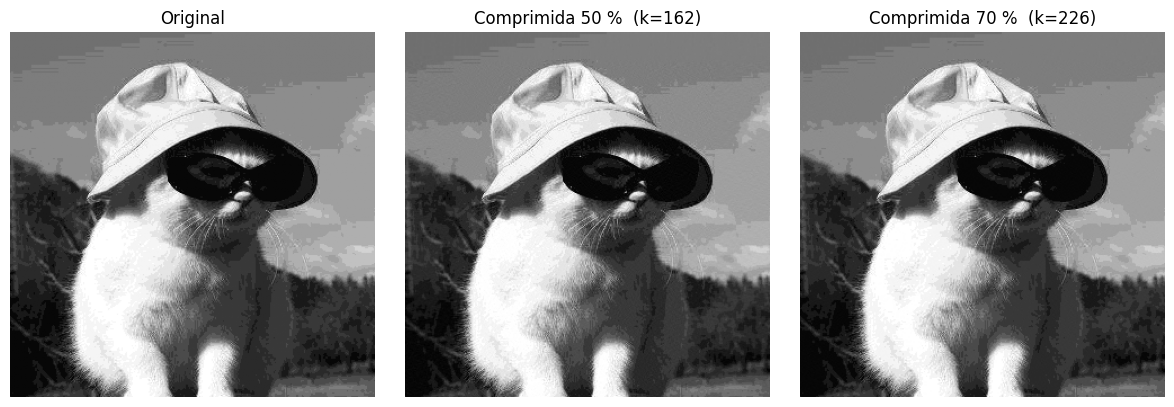

In [62]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg


#Ler a imagem em tons de cinza normalizados [0,1]

img = mpimg.imread('files-given/cat.png')

if img.ndim == 3:  # se PNG RGB → converter para cinza pela luminância
    r, g, b = img[..., 0], img[..., 1], img[..., 2]
    img = 0.2989 * r + 0.5870 * g + 0.1140 * b

img = img.astype(float) / img.max()       # normaliza (0 preto, 1 branco)


# Decomposição SVD (NumPy)

U, S, Vh = np.linalg.svd(img, full_matrices=False)


# Reconstruções com 50 % e 70 % dos valores singulares

m, n   = img.shape
r      = min(m, n)              # posto máximo possível
k50    = int(0.50 * r)          # metade dos σ_i
k70    = int(0.70 * r)          # 70 %  dos σ_i

def recon(U, S, Vh, k):
    return (U[:, :k] * S[:k]) @ Vh[:k, :]

img_50 = recon(U, S, Vh, k50)
img_70 = recon(U, S, Vh, k70)


# Plot: original · 50 % · 70 %

fig, ax = plt.subplots(1, 3, figsize=(12, 4))

titles = ['Original',
          f'Comprimida 50 %  (k={k50})',
          f'Comprimida 70 %  (k={k70})']
imgs   = [img, img_50, img_70]

for a, im, t in zip(ax, imgs, titles):
    a.imshow(im, cmap='gray', vmin=0, vmax=1)
    a.set_title(t)
    a.axis('off')

plt.tight_layout()
plt.show()


Ao comparar a imagem original com as versões comprimidas por SVD, percebe-se que a redução para 70 % dos valores singulares praticamente não altera a percepção visual: os contornos do rosto do gato, os bigodes e a textura do pelo continuam com nitidez indistinguível da matriz completa, e qualquer diferença só seria detectável por métricas numéricas como RMSE ou PSNR. Quando o número de singulares cai para 50 %, ainda se preserva toda a estrutura essencial da cena; olhos e bordas permanecem claros, mas regiões de transição muito suave, sobretudo o fundo desfocado, exibem um leve borrão se a imagem for ampliada. Mesmo assim, a versão 50 % mantém qualidade mais que adequada para visualização em tela ou documentação, oferecendo uma economia de dados expressiva em relação à original. Em síntese, a compressão a 70 % oferece praticamente a mesma fidelidade por um terço a menos de informação, enquanto a compressão a 50 % dobra essa economia com apenas uma perda moderada de suavidade em áreas menos detalhadas.

# Questão 4: Interpolação

Para a função

$$
f(t) = \frac{1}{1 + 25t^2}
$$

no intervalo $[-1, 1]$, faça:


a)  Implemente as interpolações de Lagrange e de Newton.

b) Usando 11 pontos igualmente espaçados dentro do intervalo dado, calcule as interpolações de Lagrange e Newton com o código implementado no item anterior.  Mostre os resultados em dois gráficos separados. Que resultado teórico justifica o fato das duas soluções serem iguais?

c) Repita o processo com 21 pontos. O que acontece? Exiba o gráfico das soluções comparando com a exata.

d) Usando a função `scipy.interpolate.interp1d`, calcule a interpolação usando *spline* linear e cúbica, considerando 21 pontos igualmente espaçados. Exiba os gráficos e comente as diferenças das soluções deste item para os anteriores.

e) Repita os itens b) e c) com nós de Chebyshev. Comente os resultados obtidos. Por que este resultado é melhor do que os resultados obtidos nos itens b) e c)?

## Interpolação por Sistema Linear

**Antes de começarmos a resolver as questões de fato, precimamos entender os tópicos que ela aborda.**

Este é o primeiro método de interpolação polinomial que veremos, servindo de base para as formas de Lagrange, Newton e para as análises de erro que virão em seguida. Aqui, buscamos um polinômio

$$
p_n(x) = a_0 + a_1x + a_2x^2 + \cdots + a_nx^n
$$

que satisfaça

$$
p_n(x_i) = f(x_i)\quad\text{para }i=0,\dots,n.
$$

### 1. Formulação como sistema linear

Para $n+1$ nós $\{(x_i,f(x_i))\}$, impomos

$$
\begin{cases}
a_0 + a_1x_0 + a_2x_0^2 + \cdots + a_nx_0^n = f(x_0),\\
a_0 + a_1x_1 + a_2x_1^2 + \cdots + a_nx_1^n = f(x_1),\\
\quad\vdots\\
a_0 + a_1x_n + a_2x_n^2 + \cdots + a_nx_n^n = f(x_n).
\end{cases}
$$

Em forma matricial, temos o sistema

$$
\underbrace{
\begin{bmatrix}
1 & x_0   & x_0^2   & \cdots & x_0^n\\
1 & x_1   & x_1^2   & \cdots & x_1^n\\
\vdots  & \vdots & \vdots  & \ddots & \vdots\\
1 & x_n   & x_n^2   & \cdots & x_n^n
\end{bmatrix}
}_{\text{matriz de Vandermonde}}
\!
\begin{bmatrix}a_0\\a_1\\\vdots\\a_n\end{bmatrix}
=
\begin{bmatrix}f(x_0)\\f(x_1)\\\vdots\\f(x_n)\end{bmatrix}.
$$

### 2. Exemplo numérico

Suponha os pontos

$$
\{(-1,4),\,(0,1),\,(2,3)\},
$$

logo $n=2$ e

$$
p_2(x) = a_0 + a_1x + a_2x^2.
$$

O sistema é

$$
\begin{bmatrix}
1 & -1 & 1\\
1 &  0 & 0\\
1 &  2 & 4
\end{bmatrix}
\begin{bmatrix}a_0\\a_1\\a_2\end{bmatrix}
=
\begin{bmatrix}4\\1\\3\end{bmatrix}.
$$

Da segunda equação já vem $a_0=1$. Substituindo nas demais e resolvendo:

1. $1 - a_1 + a_2 = 4$
2. $1 + 2a_1 + 4a_2 = 3$

Desses, obtemos

$$
a_2 = \tfrac{4}{3},\quad
a_1 = -\tfrac{5}{3}.
$$

Portanto,

$$
\boxed{p_2(x) = 1 - \tfrac{5}{3}\,x + \tfrac{4}{3}\,x^2.}
$$

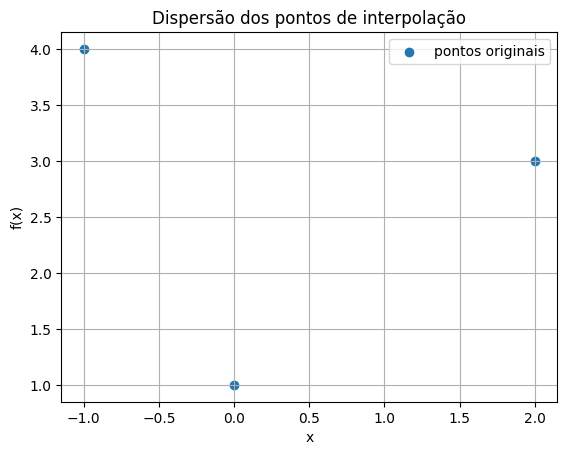

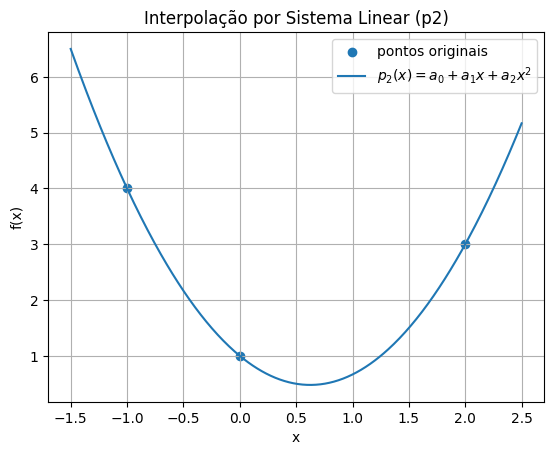

In [63]:
# define os pontos de interpolação
xi = np.array([-1, 0, 2], dtype=float)
fi = np.array([4, 1, 3], dtype=float)

# monta a matriz do sistema (Vandermonde)
A = np.column_stack([xi**0, xi, xi**2])  # colunas: [1, x, x^2]

# resolve para encontrar os coeficientes [a0, a1, a2]
a0, a1, a2 = np.linalg.solve(A, fi)

# define a função do polinômio interpolador p2(x)
def p2(x):
    return a0 + a1*x + a2*x**2

# gera pontos para o gráfico do polinômio
xx = np.linspace(xi.min() - 0.5, xi.max() + 0.5, 400)
yy = p2(xx)

# gráfico 1: dispersão dos pontos originais
plt.figure()
plt.scatter(xi, fi, marker='o', label='pontos originais')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Dispersão dos pontos de interpolação')
plt.legend()
plt.grid(True)

# gráfico 2: polinômio p2(x) sobreposto aos pontos
plt.figure()
plt.scatter(xi, fi, marker='o', label='pontos originais')
plt.plot(xx, yy, label=r'$p_2(x) = a_0 + a_1 x + a_2 x^2$')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Interpolação por Sistema Linear (p2)')
plt.legend()
plt.grid(True)

plt.show()

## Polinômios Interpoladores de Lagrange

Após formularmos a interpolação por sistema linear (matriz de Vandermonde), é comum recorrer à forma de Lagrange quando queremos, sem resolver sistemas potencialmente mal condicionados, um polinômio que passe exatamente pelos nós dados.

### 1. Motivação

* Sistemas de Vandermonde com valores muito próximos podem ser instáveis

  $$
    \begin{bmatrix}
      1 & 0.001 & 0.002\\
      1 & 0.003 & 0.005\\
      1 & 0.007 & 0.007
    \end{bmatrix}
  $$

  exigem cuidado numérico.
* A forma de Lagrange constrói o mesmo polinômio $p_n(x)$ sem montar nem inverter essa matriz.


### 2. Definição dos polinômios base $L_k(x)$

Queremos um polinômio $p_n(x)$ de grau $n$ que satisfaça $p_n(x_i)=y_i$, onde $y_i=f(x_i)$. Para isso, definimos

$$
L_k(x) = \prod_{\substack{j=0 \\ j\neq k}}^{n}
\frac{x - x_j}{x_k - x_j},
$$

que garante

$$
L_k(x_i)=
\begin{cases}
1,& i=k,\\
0,& i\neq k.
\end{cases}
$$

Então

$$
\boxed{p_n(x)=\sum_{k=0}^{n}y_k\,L_k(x).}
$$

### 3. Exemplo numérico (com destaque ao polinômio)

Dados os pontos

$$
(x_0,y_0)=(-1,6),\quad
(x_1,y_1)=(0,1),\quad
(x_2,y_2)=(2,0).
$$

Temos

$$
p_2(x)=6\,L_0(x)+1\,L_1(x)+0\,L_2(x).
$$

Calculamos cada base:

$$
\begin{aligned}
L_0(x)
&=\frac{(x-x_1)(x-x_2)}{(x_0-x_1)(x_0-x_2)}
=\frac{x(x-2)}{(-1)(-3)}
=\frac{x(x-2)}{3},\\[6pt]
L_1(x)
&=\frac{(x-x_0)(x-x_2)}{(x_1-x_0)(x_1-x_2)}
=\frac{(x+1)(x-2)}{1\cdot(-2)}
=-\frac{(x+1)(x-2)}{2},\\[6pt]
L_2(x)
&=\frac{(x-x_0)(x-x_1)}{(x_2-x_0)(x_2-x_1)}
=\frac{x(x+1)}{3\cdot2}
=\frac{x(x+1)}{6}.
\end{aligned}
$$

Substituindo:

$$
\begin{aligned}
p_2(x)
&=6\cdot\frac{x(x-2)}{3}
\;+\;1\cdot\Bigl(-\tfrac{(x+1)(x-2)}{2}\Bigr)
\;+\;0\cdot\frac{x(x+1)}{6}\\[4pt]
&=2x(x-2)\;-\;\frac{(x+1)(x-2)}{2}\\[4pt]
&=\frac{3}{2}\,x^2-\frac{7}{2}\,x+1.
\end{aligned}
$$

**Portanto, o polinômio interpolador final é**

$$
\boxed{p_2(x) = \frac{3}{2}\,x^2 - \frac{7}{2}\,x + 1.}
$$


### 4. Algoritmo de avaliação direta

Para avaliar $p_n$ num ponto $\bar x$ sem montar o polinômio completo:

1. **Entradas**
   $\{x_i\}_{i=0}^n$, $\{y_i\}_{i=0}^n$, ponto $\bar x$.
2. **Cálculo**

   $$
   p_n(\bar x)
   = \sum_{i=0}^n y_i
     \prod_{\substack{j=0\\j\neq i}}^n
       \frac{\bar x - x_j}{x_i - x_j}.
   $$
3. **Pseudocódigo**

   ```text
   result ← 0
   for i from 0 to n:
     term ← y[i]
     for j from 0 to n:
       if j≠i:
         term ← term * ((x_eval - x[j]) / (x[i] - x[j]))
     result ← result + term
   return result
   ```

Esse método é direto, evita sistemas lineares e mantém coesão com a sequência de interpolação polinomial.

## Interpolação de Newton

A forma de Newton integra naturalmente o que vimos sobre sistemas lineares e os polinômios de Lagrange, oferecendo um método incremental para construir o interpolador à medida que adicionamos nós.

### 1. Forma do polinômio

Para $n+1$ nós $\{(x_i,f(x_i))\}_{i=0}^n$, o polinômio de grau $n$ em forma de Newton é

$$
p_n(x)
= d_0
+ d_1\,(x - x_0)
+ d_2\,(x - x_0)(x - x_1)
+ \dots
+ d_n\,(x - x_0)\cdots(x - x_{n-1}),
$$

em que cada $d_i$ é uma **diferença dividida** e reflete apenas as informações dos nós até $x_i$.

### 2. Definição recursiva das diferenças divididas

1. **Ordem zero**:

   $$
   d_0 = f[x_0] = f(x_0).
   $$
2. **Ordem um**:

   $$
   d_1
   = f[x_0,x_1]
   = \frac{f(x_1)-f(x_0)}{x_1 - x_0}.
   $$
3. **Ordem $k$** (para $k\ge2$):

   $$
   d_k
   = f[x_0,\dots,x_k]
   = \frac{f[x_1,\dots,x_k] - f[x_0,\dots,x_{k-1}]}{x_k - x_0}.
   $$

Cada $d_k$ corresponde ao primeiro valor na coluna $k$ da tabela de diferenças.

### 3. Tabela de diferenças divididas

Agrupamos os cálculos em colunas de ordem crescente:

| $x$   | Ordem 0  | Ordem 1      | Ordem 2          | Ordem 3            |
| ----- | -------- | ------------ | ---------------- | ------------------ |
| $x_0$ | $f[x_0]$ |              |                  |                    |
| $x_1$ | $f[x_1]$ | $f[x_0,x_1]$ |                  |                    |
| $x_2$ | $f[x_2]$ | $f[x_1,x_2]$ | $f[x_0,x_1,x_2]$ |                    |
| $x_3$ | $f[x_3]$ | $f[x_2,x_3]$ | $f[x_1,x_2,x_3]$ | $f[x_0,\dots,x_3]$ |

O valor de $d_k$ é sempre o primeiro elemento da coluna de ordem $k$.

### 4. Exemplo prático

Dados os pontos

$$
\{(-3,-5),\;(0,2),\;(2,4)\},
$$

queremos $p_2(x)=d_0 + d_1(x+3) + d_2(x+3)(x)$.

1. **Cálculo de $d_0$, $d_1$ e $d_2$:**

   $$
   \begin{aligned}
     d_0 &= f[-3] = -5,\\
     d_1 &= f[-3,0] = \frac{2 - (-5)}{0 - (-3)} = \frac{7}{3},\\
     d_2 &= f[-3,0,2]
           = \frac{f[0,2] - f[-3,0]}{2 - (-3)}
           = \frac{\frac{4-2}{2-0} - \frac{7}{3}}{5}
           = -\frac{4}{15}\quad(\text{o valor aproximado pode variar}).
   \end{aligned}
   $$
2. **Montagem de $p_2(x)$:**

   $$
   p_2(x)
   = -5
   + \tfrac{7}{3}\,(x + 3)
   - \tfrac{4}{15}\,(x + 3)\,x.
   $$
3. **Forma polinomial expandida** (opcional):

   $$
   p_2(x)
   = \frac{17}{30}\,x^2 + \frac{19}{30}\,x + 2.
   $$

### 5. Escolha do grau adequado

A tabela de diferenças também indica a ordem necessária:

* Se as diferenças de ordem $j$ se estabilizam (coluna $j+1$ tende a zero), então um polinômio de grau $j$ é suficiente naquela região.
* Exemplo rápido: com nós em $0,0.1,0.2,0.3,0.4$, as diferenças de ordem 2 ficaram quase constantes e as de ordem 3 muito pequenas, indicando grau 2.

### 6. Algoritmo de implementação 

Definimos $F_{i,j}=f[x_{i-j},\dots,x_i]$.

1. **Entradas**

   * $x = (x_0, x_1, \dots, x_n)$
   * $y = (f(x_0), f(x_1), \dots, f(x_n))$
   * ponto de avaliação $\xi$

2. **Construção da tabela de diferenças**

   ```text
   F[i,0] ← y[i]                       para i = 0,…,n
   para i de 1 até n:
     para j de 1 até i:
       F[i,j] ← (F[i,j−1] − F[i−1,j−1]) / (x[i] − x[i−j])
   ```

   Ao final, os coeficientes de Newton são

   $$
     D_k = F[k,k],\quad k=0,\dots,n.
   $$

3. **Avaliação direta em $\xi$**
   
   Em vez de reconstruir o polinômio completo, calculamos

   $$
     p_n(\xi)
     = D_0
     + D_1(\xi - x_0)
     + D_2(\xi - x_0)(\xi - x_1)
     + \cdots
     + D_n(\xi - x_0)\cdots(\xi - x_{n-1}).
   $$

   **Passo a passo**:

   * Inicialize

     $$
       \text{resultado} \leftarrow D_0,\quad
       \text{produto} \leftarrow 1.
     $$
   * Para cada $k$ de 1 até $n$:

     1. Atualize o produto acumulado:

        $$
          \text{produto} \leftarrow \text{produto}\times(\xi - x_{k-1}).
        $$
     2. Some ao resultado:

        $$
          \text{resultado} \leftarrow \text{resultado} + D_k \times \text{produto}.
        $$
   * No fim, **resultado** contém $p_n(\xi)$.

   Fazer isso implica em:

   * **$\mathbf{O}(n^2)$** operações (aproximadamente $\tfrac{n(n+1)}2$ multiplicações),
   * aproveita todo o trabalho da tabela de diferenças,
   * e evita manipular somas de potências ou refazer coeficientes.

Com isso podemos fazer o métodos de Newton mantendo coesão e eficiência.

### 7. Devo usar o método de Newton?

#### Vantagens

* **Incrementalidade**
  Você pode adicionar um novo nó $x_{n+1}$ sem refazer todo o cálculo: basta estender a tabela de diferenças divididas e acrescentar mais um termo $d_{n+1}(x - x_0)\cdots(x - x_n)$.
* **Estabilidade computacional**
  Quando os nós estão razoavelmente bem espaçados, as diferenças divididas tendem a crescer com moderação, evitando coeficientes gigantes que aparecem em outras formas (por exemplo, a forma monomial).
* **Reuso de cálculos**
  Parte da tabela já calculada para grau $k$ serve diretamente para grau $k+1$.

#### Desvantagens

* **Ordem dos nós importa**
  Se você mudar a ordem dos $x_i$, os coeficientes $d_i$ mudam completamente e é preciso reconstruir toda a tabela.
* **Custo para muitos nós**
  Para $n$ muito grande, a tabela de diferenças tem $\tfrac{n(n+1)}2$ entradas, e a avaliação direta acumula muitos fatores $(\xi - x_m)$.
* **Sensível a nós mal escolhidos**
  Nós muito próximos podem causar cancelamentos numéricos; nós muito espaçados podem gerar oscilações.

## Erro exato na interpolação

Após resolvermos o sistema linear para determinar os coeficientes de um polinômio interpolador, seja na forma de Lagrange ou de Newton, precisamos quantificar o desvio entre o valor real de $f(x)$ e sua aproximação $p_n(x)$. 

### 1. Contexto e exemplo

Como vimos nas formas de Newton e Lagrange, construímos um polinômio de grau 2 para aproximar

$$
f(x) = \ln(x) + 3x^2
$$

usando os nós $x_0=1$, $x_1=2$ e $x_2=3$. A partir da tabela de diferenças divididas:

| nó | $d_0$   | $d_1$   | $d_2$  |
| -- | ------- | ------- | ------ |
| 1  | 3.0000  |         |        |
| 2  | 12.6931 | 9.6931  |        |
| 3  | 28.0986 | 15.4055 | 2.8562 |

obtemos

$$
d_0 = 3,\quad d_1 = 9.6931,\quad d_2 = 2.8562
$$

e, por definição na forma de Newton,

$$
p_2(x)
= d_0 + d_1(x - x_0) + d_2(x - x_0)(x - x_1)
= 3 + 9.6931(x - 1) + 2.8562\,(x - 1)(x - 2).
$$

Expandindo,

$$
p_2(x) = 2.8562\,x^2 + 1.1245\,x - 0.9807.
$$

Logo,

$$
p_2(2.5) = 19.6818.
$$

### 2. Definição de erro exato

Já que $p_2(2.5)$ é apenas uma aproximação, definimos o **erro exato** como

$$
E(2.5) = \bigl|f(2.5) - p_2(2.5)\bigr|
= \bigl|\ln(2.5) + 3\cdot2.5^2 - 19.6818\bigr|
= \bigl|19.6663 - 19.6818\bigr|
= 0.0155.
$$


### 3. Limitante superior do erro

Para garantir um máximo para o desvio em todo o intervalo $[1,3]$, utilizamos o teorema do erro em interpolação: se $f$ é $n+1$ vezes diferenciável e os nós são equidistantes com passo $h$, então

$$
E(x)\le \frac{h^{\,n+1}\,M_{n+1}}{4\,(n+1)},
$$

onde

$$
M_{n+1} = \max_{x\in [x_0,x_n]}\bigl|f^{(n+1)}(x)\bigr|.
$$

Aqui, $n=2$, $h=1$ e

$$
f^{(3)}(x) = \frac{2}{x^3},
$$

que atinge seu valor máximo em $x=1$, logo $M_3 = 2$. Assim,

$$
E(x)\le \frac{1^3\cdot 2}{4\cdot 3} = 0.1667,
$$

o que é válido para qualquer $x\in[1,3]$.

Quando os nós não são equidistantes, o limite geral é

$$
E(x)\le \bigl|(x - x_0)\,(x - x_1)\dots (x - x_n)\bigr|\;\frac{M_{n+1}}{(n+1)!}.
$$


### 4. Estimativa prática do erro

Em aplicações reais, $f$ pode não ser conhecida, tornando $\xi$ inalcançável. Para contornar isso, usamos a diferença dividida de ordem $n+1$ como aproximação de $\tfrac{M_{n+1}}{(n+1)!}$:

$$
\frac{M_{n+1}}{(n+1)!}\approx |d_{n+1}|.
$$

Portanto,

$$
E(x)\approx \bigl|(x - x_0)\dots(x - x_n)\bigr|\;|d_{n+1}|.
$$

No exemplo, $d_3=0.0283$ e

$$
E(2.5)\approx (2.5 - 1)(2.5 - 2)(2.5 - 3)\times 0.0283 = 0.0106,
$$

uma boa estimativa frente ao erro exato de $0.0155$.


## Interpolação por Splines

Quando o grau do polinômio cresce, as oscilações indesejadas surgem (fenômeno de Runge) e montar um polinômio único torna-se instável. Splines resolvem isso dividindo o domínio em subintervalos e usando polinômios de grau baixo, que se encaixam suavemente.

### 1. Definição geral

Dado um conjunto de nós $x_0< x_1<\dots< x_n$, uma spline de grau $m$ é uma função

$$
S(x)=
\begin{cases}
S_0(x),&x\in[x_0,x_1],\\
S_1(x),&x\in[x_1,x_2],\\
\;\vdots\\
S_{n-1}(x),&x\in[x_{n-1},x_n],
\end{cases}
$$

onde cada $S_i(x)$ é um polinômio de grau $m$, tal que:

1. **Interpolação:**   $S_i(x_i)=f(x_i)$ e $S_i(x_{i+1})=f(x_{i+1})$.
2. **Suavidade:**     $S_i$ e suas derivadas até a ordem $m-1$ coincidem nos nós internos.

### 2. Spline linear

* **Grau 1** em cada $[x_i,x_{i+1}]$:

  $$
    s_i(x)
    =\frac{x_{i+1}-x}{h_i}f(x_i)
    +\frac{x - x_i}{h_i}f(x_{i+1}),\quad
    h_i = x_{i+1}-x_i.
  $$
* **Características:**

  * Fácil de implementar e avaliar.
  * Contínua, mas sem derivada contínua nos nós.
* **Algoritmo de avaliação em $\bar x$:**

  1. Encontre $i$ tal que $\bar x\in[x_i,x_{i+1}]$.
  2. Calcule $s_i(\bar x)$ pela fórmula acima.

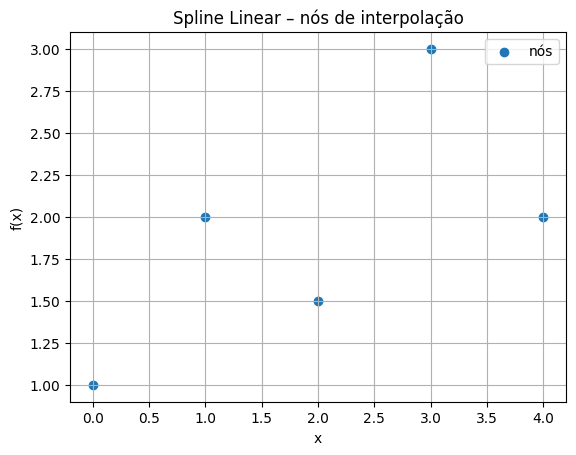

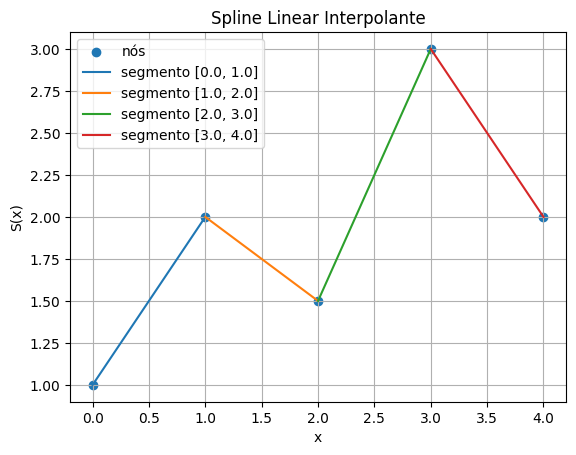

In [64]:
# nós e valores da função
xi = np.array([0, 1, 2, 3, 4], dtype=float)
fi = np.array([1, 2, 1.5, 3, 2], dtype=float)

# plot dos nós
plt.figure()
plt.scatter(xi, fi, marker='o', label='nós')
plt.title('Spline Linear – nós de interpolação')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.grid(True)
plt.legend()

# plot dos segmentos de spline linear
plt.figure()
plt.scatter(xi, fi, marker='o', label='nós')
for i in range(len(xi) - 1):
    x_segment = np.linspace(xi[i], xi[i+1], 100)
    h = xi[i+1] - xi[i]
    y_segment = ((xi[i+1] - x_segment) / h) * fi[i] + ((x_segment - xi[i]) / h) * fi[i+1]
    plt.plot(x_segment, y_segment, label=f'segmento [{xi[i]}, {xi[i+1]}]')
plt.title('Spline Linear Interpolante')
plt.xlabel('x')
plt.ylabel('S(x)')
plt.grid(True)
plt.legend()
plt.show()

### 3. Spline cúbica natural

Usa polinômios de grau 3 em cada intervalo, impondo:

1. **Interpolação:**
   $S_i(x_i)=f(x_i)$, $S_i(x_{i+1})=f(x_{i+1})$.
2. **Suavidade:**
   $S_i'(x_{i+1})=S_{i+1}'(x_{i+1})$,
   $S_i''(x_{i+1})=S_{i+1}''(x_{i+1})$.
3. **Condições naturais:**
   $S''(x_0)=0$ e $S''(x_n)=0$.

Chamando $h_i=x_{i+1}-x_i$ e $\Delta y_i=f(x_{i+1})-f(x_i)$, montamos o sistema tridiagonal para os coeficientes $b_i=S_i''(x_i)$:

$$
\begin{bmatrix}
1 &        &        &   &   \\[-3pt]
h_0 & 2(h_0+h_1) & h_1 &   &   \\[-3pt]
    & \ddots & \ddots & \ddots &   \\[-3pt]
    &        & h_{n-1} & 2(h_{n-1}+h_n) & h_n \\[-3pt]
    &        &        &        & 1
\end{bmatrix}
\!
\begin{bmatrix}b_0\\b_1\\\vdots\\b_{n-1}\\b_n\end{bmatrix}
=
3
\begin{bmatrix}
0\\
\frac{\Delta y_1}{h_1}-\frac{\Delta y_0}{h_0}\\
\vdots\\
\frac{\Delta y_n}{h_n}-\frac{\Delta y_{n-1}}{h_{n-1}}\\
0
\end{bmatrix}.
$$

Após resolver $\mathbf A\,\mathbf b=\mathbf g$, os outros coeficientes em cada subintervalo são:

$$
\begin{aligned}
a_i &= \frac{b_i - b_{i-1}}{3\,h_i},\\
c_i &= \frac{\Delta y_{i-1}}{h_{i-1}}
        -\frac{h_{i-1}}{3}(2b_{i-1}+b_i),\\
d_i &= f(x_{i-1}).
\end{aligned}
$$

O polinômio em $[x_{i-1},x_i]$ é

$$
S_{i-1}(x)
= a_i\,(x - x_{i-1})^3
+ b_{i-1}\,(x - x_{i-1})^2
+ c_i\,(x - x_{i-1})
+ d_i.
$$

* **Algoritmo resumido:**

  1. Calcule todos os $h_i$ e $\Delta y_i$.
  2. Monte $A$ e $\mathbf g$.
  3. Resolva o sistema para $\mathbf b$.
  4. Calcule $a_i,c_i,d_i$.
  5. Para cada $\bar x$, identifique o subintervalo e avalie o polinômio correspondente.

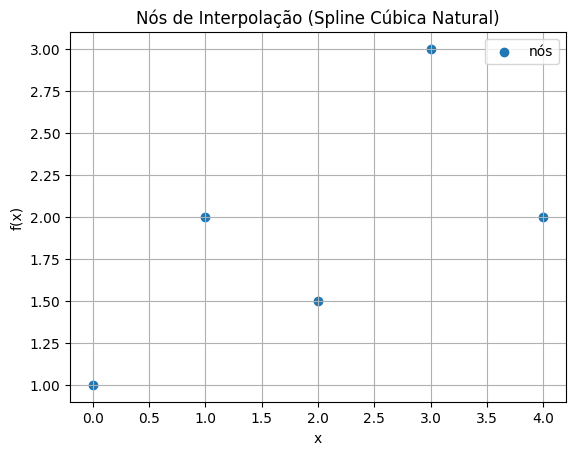

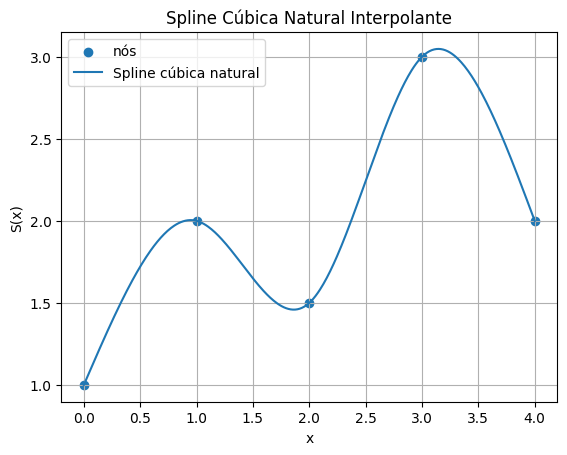

In [65]:
# defininfo os nós e valores da função
xi = np.array([0, 1, 2, 3, 4], dtype=float)
fi = np.array([1, 2, 1.5, 3, 2], dtype=float)

n = len(xi) - 1
h = xi[1:] - xi[:-1]
deltay = fi[1:] - fi[:-1]

# monta a matriz tridiagonal A e o vetor g
A = np.zeros((n+1, n+1))
g = np.zeros(n+1)
A[0, 0] = 1
A[n, n] = 1
for i in range(1, n):
    A[i, i-1] = h[i-1]
    A[i, i] = 2 * (h[i-1] + h[i])
    A[i, i+1] = h[i]
    g[i] = 3 * (deltay[i] / h[i] - deltay[i-1] / h[i-1])

# resolve para obter b = S'' nos nós
b = np.linalg.solve(A, g)

# calcula coeficientes a_i, c_i, d_i em cada subintervalo
a = np.zeros(n+1)
c = np.zeros(n+1)
d = np.zeros(n+1)
for i in range(1, n+1):
    a[i] = (b[i] - b[i-1]) / (3 * h[i-1])
    c[i] = deltay[i-1] / h[i-1] - h[i-1] * (2*b[i-1] + b[i]) / 3
    d[i] = fi[i-1]

# função que avalia a spline natural em x
def S(x):
    idx = np.searchsorted(xi, x)
    if idx == 0:
        idx = 1
    elif idx > n:
        idx = n
    dx = x - xi[idx-1]
    return a[idx]*dx**3 + b[idx-1]*dx**2 + c[idx]*dx + d[idx]

# gera pontos para plotar a curva suave
xx = np.linspace(xi[0], xi[-1], 400)
yy = np.array([S(x) for x in xx])

# gráfico 1: scatter dos nós
plt.figure()
plt.scatter(xi, fi, marker='o', label='nós')
plt.title('Nós de Interpolação (Spline Cúbica Natural)')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.grid(True)
plt.legend()

# gráfico 2: curva suave piecewise + nós
plt.figure()
plt.scatter(xi, fi, marker='o', label='nós')
plt.plot(xx, yy, label='Spline cúbica natural')
plt.title('Spline Cúbica Natural Interpolante')
plt.xlabel('x')
plt.ylabel('S(x)')
plt.grid(True)
plt.legend()

plt.show()

### 4. Considerações finais

* **Spline linear** é simples, mas apenas contínua.
* **Spline cúbica natural** oferece suavidade até a segunda derivada e evita oscilações de alto grau.
* Ambas mantêm coesão com os métodos polinomiais anteriores, mas dividem o problema em pedaços, o que melhora estabilidade e flexibilidade.

## Resolução da a)

### Lagrange

Vamos implementar a interpolação de Lagrange de acordo com a definição teórica:

* Cada polinômio base $L_k(x)$ é construído como

  $$
    L_k(x) = \prod_{\substack{j=0\\j\neq k}}^n \frac{x - x_j}{x_k - x_j},
  $$

  garantindo $L_k(x_i)=\delta_{ik}$.
* O interpolador $p_n(x)$ é

  $$
    p_n(x) = \sum_{k=0}^n y_k\,L_k(x).
  $$

No código:

* lagrange\_basis: monta cada $L_k$ seguindo o produto acima.
* lagrange\_interp: soma $y_k L_k(x)$ para formar $p_n(x)$.
* O teste confirma que $p_n(x_i)=y_i$.

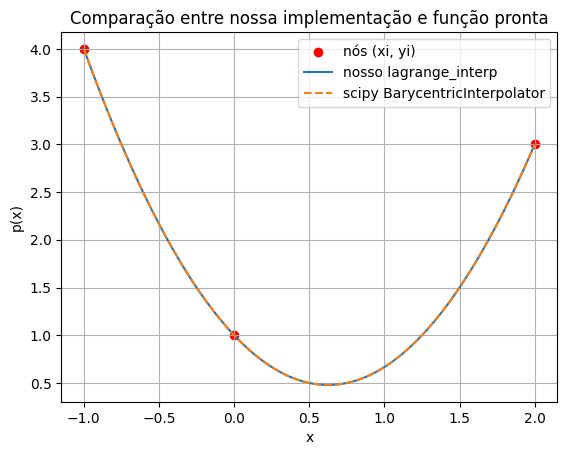

custom p(xi): [4. 1. 3.]
scipy p(xi):  [4. 1. 3.]


In [26]:
# define os nós e valores de exemplo
xi = np.array([-1.0, 0.0, 2.0])
yi = np.array([4.0, 1.0, 3.0])

# define nossa implementação de Lagrange
def lagrange_basis(xi, k, x):
    Lk = np.ones_like(x, dtype=float)
    for j, xj in enumerate(xi):
        if j != k:
            Lk *= (x - xj) / (xi[k] - xj)
    return Lk

def lagrange_interp(xi, yi, x_eval):
    p = np.zeros_like(x_eval, dtype=float)
    for k, yk in enumerate(yi):
        p += yk * lagrange_basis(xi, k, x_eval)
    return p

# usa BarycentricInterpolator da SciPy para validação
bary = BarycentricInterpolator(xi, yi)

# pontos para avaliar o interpolador
xx = np.linspace(xi.min(), xi.max(), 200)
yy_custom = lagrange_interp(xi, yi, xx)
yy_scipy = bary(xx)

# gráfico comparativo
plt.figure()
plt.scatter(xi, yi, color='red', label='nós (xi, yi)')
plt.plot(xx, yy_custom, label='nosso lagrange_interp')
plt.plot(xx, yy_scipy, '--', label='scipy BarycentricInterpolator')
plt.title('Comparação entre nossa implementação e função pronta')
plt.xlabel('x')
plt.ylabel('p(x)')
plt.legend()
plt.grid(True)
plt.show()

# verifica p(xi) nos dois métodos
print("custom p(xi):", lagrange_interp(xi, yi, xi))
print("scipy p(xi): ", bary(xi))

## Newton

* **newton\_coeffs** constrói a tabela de diferenças divididas conforme a teoria:

  $$
    d_k = f[x_0,\dots,x_k] = \frac{f[x_1,\dots,x_k] - f[x_0,\dots,x_{k-1}]}{x_k - x_0}\,.
  $$
* **newton\_interp** avalia o polinômio em forma de Horner reverso:

  $$
    p_n(x)
    = d_0 + (x - x_0)\bigl(d_1 + (x - x_1)\bigl(d_2 + \dots\bigr)\bigr),
  $$

  garantindo $p_n(x_i)=y_i$.

O gráfico compara nosso `newton_interp` com o `KroghInterpolator` do SciPy, confirmando igualdade.


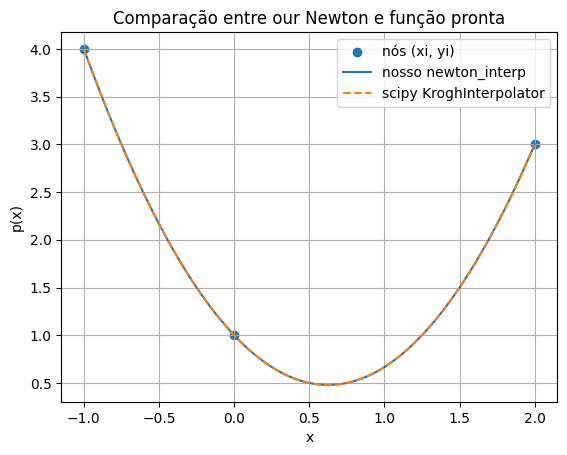

custom p(xi): [4. 1. 3.]
scipy p(xi):  [4. 1. 3.]


In [28]:
# calcula coeficientes de Newton via diferenças divididas
def newton_coeffs(xi, yi):
    n = len(xi)
    dd = np.zeros((n, n))
    dd[:, 0] = yi
    for j in range(1, n):
        for i in range(n - j):
            dd[i, j] = (dd[i + 1, j - 1] - dd[i, j - 1]) / (xi[i + j] - xi[i])
    return dd[0]  # primeiros elementos de cada coluna são d0, d1, ..., dn

# avalia o polinômio de Newton em x_eval usando forma de Horner
def newton_interp(xi, yi, x_eval):
    coeffs = newton_coeffs(xi, yi)
    p = np.zeros_like(x_eval, dtype=float)
    # Horner reverso para Newton: inicia com dn e acumula
    for k in range(len(coeffs) - 1, -1, -1):
        p = coeffs[k] + (x_eval - xi[k]) * p
    return p

# nós de exemplo
xi = np.array([-1.0, 0.0, 2.0])
yi = np.array([4.0, 1.0, 3.0])

# pontos para avaliação
xx = np.linspace(xi.min(), xi.max(), 200)
yy_custom = newton_interp(xi, yi, xx)

# interpolador pronto (SciPy KroghInterpolator)
krogh = KroghInterpolator(xi, yi)
yy_scipy = krogh(xx)

# gráfico comparativo
plt.figure()
plt.scatter(xi, yi, marker='o', label='nós (xi, yi)')
plt.plot(xx, yy_custom, label='nosso newton_interp')
plt.plot(xx, yy_scipy, '--', label='scipy KroghInterpolator')
plt.title('Comparação entre our Newton e função pronta')
plt.xlabel('x')
plt.ylabel('p(x)')
plt.legend()
plt.grid(True)
plt.show()

# verifica valores nos nós
print("custom p(xi):", newton_interp(xi, yi, xi))
print("scipy p(xi): ", krogh(xi))


## Resolução da b)

Nos dois gráficos vemos que os interpoladores de Lagrange e de Newton coincidem exatamente nas mesmas curvas (apesar de se afastarem da f(t) exata em extremidades, fenômeno de Runge):

* **Teorema da unicidade do polinômio interpolador**: dado um conjunto de n+1 nós e valores, existe exatamente um polinômio de grau ≤n que passa por esses pontos.
* Tanto a forma de Lagrange quanto a forma de Newton constroem este mesmo polinômio de grau 10 (n = 10), portanto seus resultados são idênticos.

Isso é o que garante que, apesar das implementações diferentes, a saída numérica coincide para quaisquer nós e quaisquer valores.


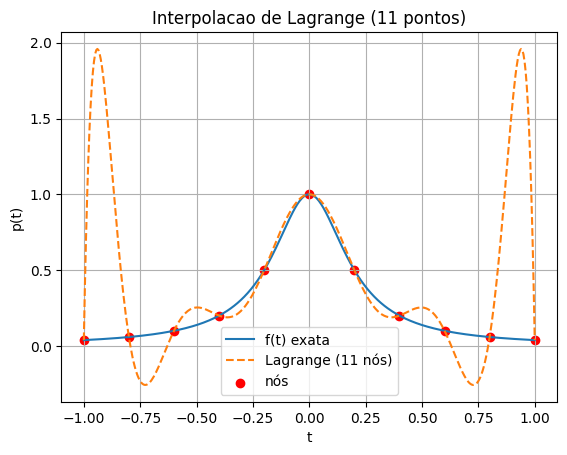

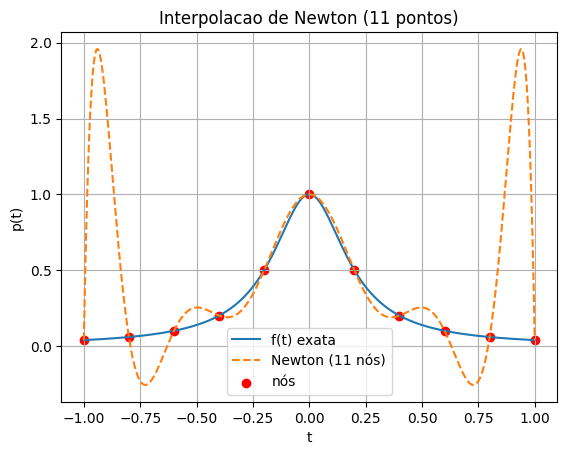

In [29]:
# função alvo
def f(t):
    return 1 / (1 + 25 * t**2)

# gera 11 pontos igualmente espaçados em [-1, 1]
xi = np.linspace(-1, 1, 11)
yi = f(xi)

# pontos para avaliação contínua
xx = np.linspace(-1, 1, 400)

# reutiliza funções de interpolação implementadas
yy_lagrange = lagrange_interp(xi, yi, xx)
yy_newton   = newton_interp(xi, yi, xx)
yy_exact    = f(xx)

# gráfico 1: Lagrange vs exata
plt.figure()
plt.plot(xx, yy_exact, label='f(t) exata')
plt.plot(xx, yy_lagrange, '--', label='Lagrange (11 nós)')
plt.scatter(xi, yi, color='red', label='nós')
plt.title('Interpolacao de Lagrange (11 pontos)')
plt.xlabel('t')
plt.ylabel('p(t)')
plt.legend()
plt.grid(True)

# gráfico 2: Newton vs exata
plt.figure()
plt.plot(xx, yy_exact, label='f(t) exata')
plt.plot(xx, yy_newton, '--', label='Newton (11 nós)')
plt.scatter(xi, yi, color='red', label='nós')
plt.title('Interpolacao de Newton (11 pontos)')
plt.xlabel('t')
plt.ylabel('p(t)')
plt.legend()
plt.grid(True)

plt.show()

## Resolução da c)

Com 21 nós igualmente espaçados, o polinômio de grau 20 oscila muito nas extremidades, isso é o clássico **fenômeno de Runge** dito na teoria. 

Podemos notar que:

* No centro, próximo de $t=0$, a aproximação ainda é razoável.
* Próximo de $t=-1$ e $t=1$, os valores extrapolados dispararam para além de $-60$ e $+5$, enquanto a $f(t)$ exata está em torno de $0,04$.
* Tanto Lagrange quanto Newton produzem o mesmo polinômio (por unicidade), então a curva de Newton seria idêntica à de Lagrange.

Isso mostra que usar muitos nós igualmente espaçados pode ser pior do que usar poucos, devido à instabilidade numérica do polinômio de alto grau.


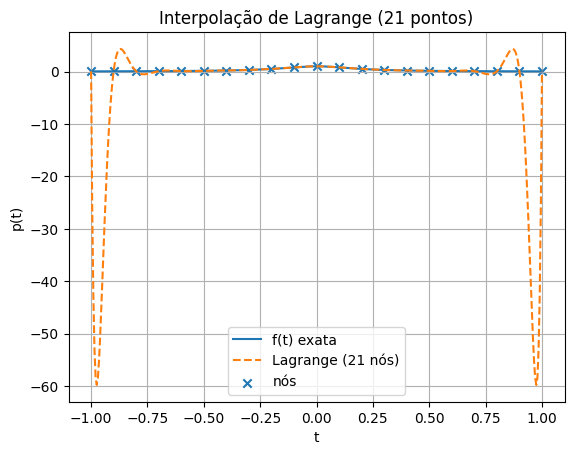

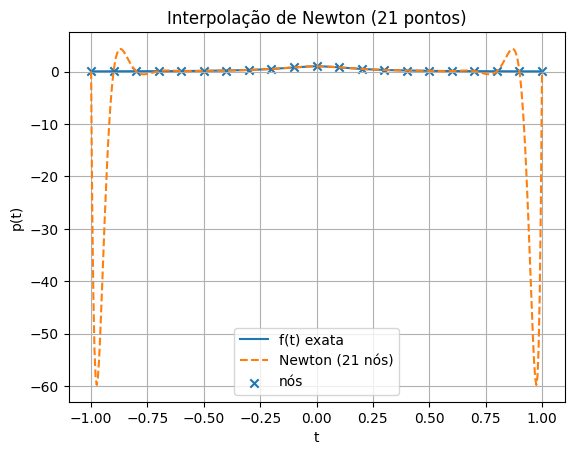

In [30]:
# função alvo
def f(t):
    return 1 / (1 + 25 * t**2)

# 21 pontos igualmente espaçados em [-1, 1]
xi = np.linspace(-1, 1, 21)
yi = f(xi)

# pontos contínuos para avaliação
xx = np.linspace(-1, 1, 400)

# reutiliza lagrange_interp e newton_interp previamente definidas
yy_lagrange = lagrange_interp(xi, yi, xx)
yy_newton   = newton_interp(xi, yi, xx)
yy_exact    = f(xx)

# gráfico Lagrange (21 nós)
plt.figure()
plt.plot(xx, yy_exact, label='f(t) exata')
plt.plot(xx, yy_lagrange, '--', label='Lagrange (21 nós)')
plt.scatter(xi, yi, marker='x', label='nós')
plt.title('Interpolação de Lagrange (21 pontos)')
plt.xlabel('t')
plt.ylabel('p(t)')
plt.legend()
plt.grid(True)

# gráfico Newton (21 nós)
plt.figure()
plt.plot(xx, yy_exact, label='f(t) exata')
plt.plot(xx, yy_newton, '--', label='Newton (21 nós)')
plt.scatter(xi, yi, marker='x', label='nós')
plt.title('Interpolação de Newton (21 pontos)')
plt.xlabel('t')
plt.ylabel('p(t)')
plt.legend()
plt.grid(True)

plt.show()

## Resolução da d)

Na implementação usamos `interp1d` de duas formas que correspondem exatamente como estudamos na teoria:

1. **Spline linear**

   * É uma função peça-por-peça de grau 1 em cada intervalo $[x_i,x_{i+1}]$,

     $$
       s_i(x) = \frac{x_{i+1}-x}{h_i}\,f(x_i) \;+\;\frac{x-x_i}{h_i}\,f(x_{i+1}),\quad h_i=x_{i+1}-x_i.
     $$
   * Característica: garante apenas continuidade de valor em cada nó, sem derivada contínua.
   * No gráfico, vemos segmentos retos que acompanham razoavelmente $f(t)$ mas formam “quebra” na inclinação em cada nó.

2. **Spline cúbica natural**

   * Usa polinômios de grau 3 em cada pedaço, impondo

     1. continuidade de valor e de primeira e segunda derivada nos nós internos,
     2. condições naturais $S''(x_0)=0$ e $S''(x_n)=0$.
   * Constrói-se um sistema tridiagonal para os valores de $S''(x_i)$, resolve-se $\mathbf A\,\mathbf b=\mathbf g$ e então avaliam-se as peças cúbicas

     $$
       S_{i-1}(x)
       = a_i\,(x - x_{i-1})^3
       + b_{i-1}\,(x - x_{i-1})^2
       + c_i\,(x - x_{i-1})
       + d_i,
     $$

     com $a_i,c_i,d_i$ calculados a partir de $b$.
   * Sua caracteristica é garantir a suavidade de segunda derivada e evita oscilações de alto grau.

**Comparação com os polinômios globais**

* Nos itens (b) e (c) vimos que polinômios de grau 10 e 20 (Lagrange/Newton) sofrem o fenômeno de Runge em nós igualmente espaçados.
* Já as splines não usam um único polinômio de grau elevado, mas pequenos polinômios locais de grau baixo, aplicando condições de suavidade para se encaixarem.
* Por isso, a spline cúbica natural acompanha $f(t)$ com alta fidelidade, mesmo em $[-1,1]$ com 21 nós, sem oscilações extremas.

Dessa forma, o uso de splines, em particular a cúbica natural, corrige a instabilidade dos polinômios de grau alto e produz uma interpolação suave e precisa.

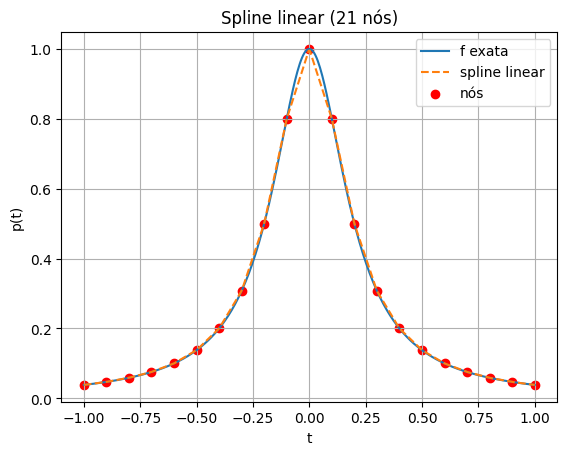

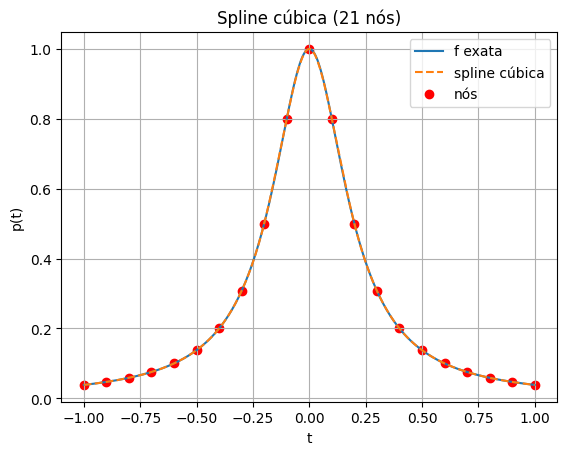

In [31]:
# define a função alvo
def f(t):
    return 1 / (1 + 25 * t**2)

# 21 nós igualmente espaçados
xi = np.linspace(-1, 1, 21)
yi = f(xi)

# pontos contínuos para avaliar
xx = np.linspace(-1, 1, 400)

# cria interpoladores spline linear e cúbica
spline_linear = interp1d(xi, yi, kind='linear')
spline_cubic = interp1d(xi, yi, kind='cubic')

# avalia
yy_linear = spline_linear(xx)
yy_cubic = spline_cubic(xx)
yy_exact = f(xx)

# gráfico spline linear
plt.figure()
plt.plot(xx, yy_exact, label='f exata')
plt.plot(xx, yy_linear, '--', label='spline linear')
plt.scatter(xi, yi, color='red', label='nós')
plt.title('Spline linear (21 nós)')
plt.xlabel('t')
plt.ylabel('p(t)')
plt.legend()
plt.grid(True)

# gráfico spline cúbica
plt.figure()
plt.plot(xx, yy_exact, label='f exata')
plt.plot(xx, yy_cubic, '--', label='spline cúbica')
plt.scatter(xi, yi, color='red', label='nós')
plt.title('Spline cúbica (21 nós)')
plt.xlabel('t')
plt.ylabel('p(t)')
plt.legend()
plt.grid(True)

plt.show()

## Resolução da e)

Nos gráficos com nós de Chebyshev vemos:

* **11 nós de Chebyshev**: tanto Lagrange quanto Newton (grau 10) acompanham $f(t)$ muito melhor que com nós igualmente espaçados. As pequenas oscilações nas extremidades ainda ocorrem, mas de forma muito mais contida.

* **21 nós de Chebyshev**: o polinômio de grau 20 agora também se comporta de maneira estável, sem explosões nos extremos. A aproximação é muito próxima de $f(t)$ em todo o intervalo.

**Por que funciona melhor?**

Segundo a teoria na parte de Nós de Chebyshev:

* Os nós de Chebyshev minimizam a **constante de Lebesgue** para interpolação polinomial, reduzindo o erro máximo $\|f - p_n\|_\infty$.
* Eles se concentram mais nas extremidades, onde a curva $f(t)$ varia mais abruptamente, controlando melhor as oscilações do polinômio global.
* Em contraste, nós igualmente espaçados levam ao fenômeno de Runge em alto grau, pois não fornecem amostra suficiente perto dos extremos.

Portanto, usar nós de Chebyshev garante um polinômio único de alta fidelidade, evitando instabilidade numérica e grandes oscilações que vimos nos itens (b) e (c).


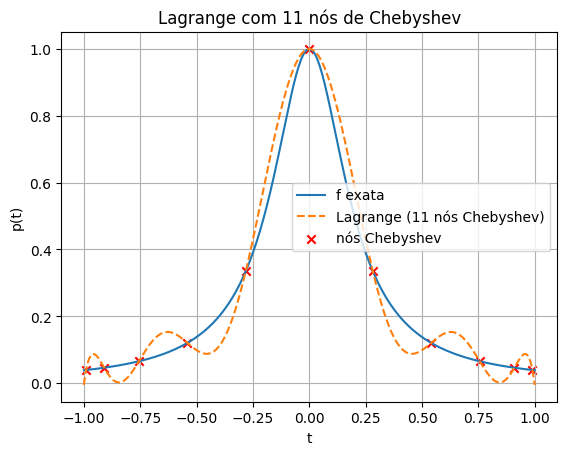

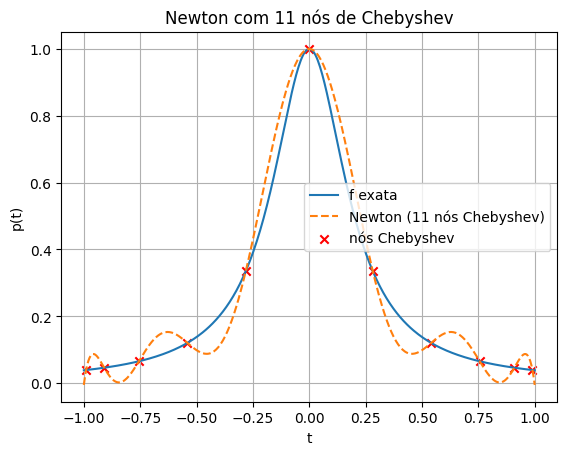

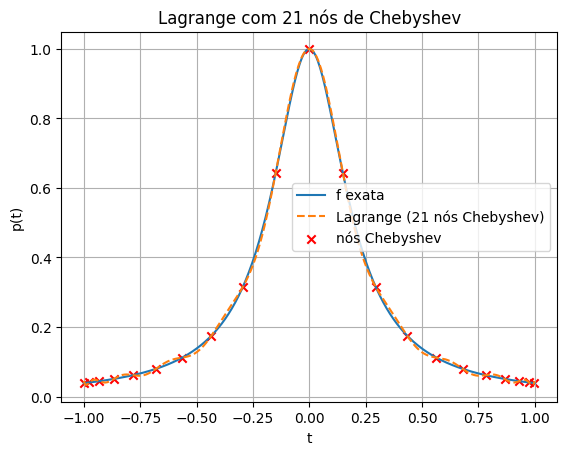

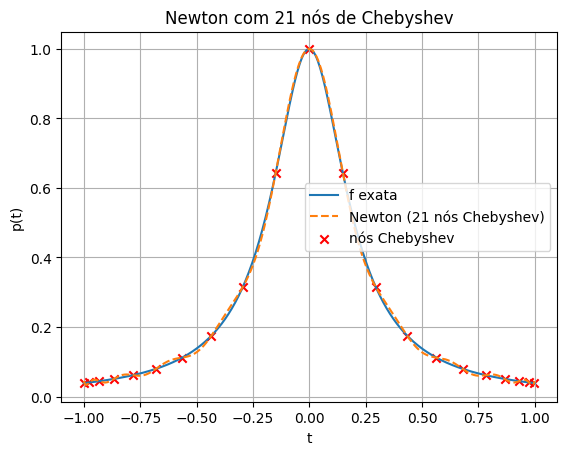

In [32]:
# função alvo
def f(t):
    return 1 / (1 + 25 * t**2)

# gera nós de Chebyshev (primeira espécie) em [-1, 1]
def chebyshev_nodes(N):
    k = np.arange(N + 1)
    return np.cos((2*k + 1) / (2*(N + 1)) * np.pi)

# avaliação contínua
xx = np.linspace(-1, 1, 400)
yy_exact = f(xx)

# Interpolação com 11 nós de Chebyshev 
N1 = 10
xi1 = chebyshev_nodes(N1)
yi1 = f(xi1)

yyL1 = lagrange_interp(xi1, yi1, xx)
yyN1 = newton_interp(xi1, yi1, xx)

# gráfico Lagrange (11 Chebyshev)
plt.figure()
plt.plot(xx, yy_exact, label='f exata')
plt.plot(xx, yyL1, '--', label='Lagrange (11 nós Chebyshev)')
plt.scatter(xi1, yi1, marker='x', color='red', label='nós Chebyshev')
plt.title('Lagrange com 11 nós de Chebyshev')
plt.xlabel('t')
plt.ylabel('p(t)')
plt.legend()
plt.grid(True)

# gráfico Newton (11 Chebyshev)
plt.figure()
plt.plot(xx, yy_exact, label='f exata')
plt.plot(xx, yyN1, '--', label='Newton (11 nós Chebyshev)')
plt.scatter(xi1, yi1, marker='x', color='red', label='nós Chebyshev')
plt.title('Newton com 11 nós de Chebyshev')
plt.xlabel('t')
plt.ylabel('p(t)')
plt.legend()
plt.grid(True)

# Interpolação com 21 nós de Chebyshev
N2 = 20
xi2 = chebyshev_nodes(N2)
yi2 = f(xi2)

yyL2 = lagrange_interp(xi2, yi2, xx)
yyN2 = newton_interp(xi2, yi2, xx)

# gráfico Lagrange (21 Chebyshev)
plt.figure()
plt.plot(xx, yy_exact, label='f exata')
plt.plot(xx, yyL2, '--', label='Lagrange (21 nós Chebyshev)')
plt.scatter(xi2, yi2, marker='x', color='red', label='nós Chebyshev')
plt.title('Lagrange com 21 nós de Chebyshev')
plt.xlabel('t')
plt.ylabel('p(t)')
plt.legend()
plt.grid(True)

# gráfico Newton (21 Chebyshev)
plt.figure()
plt.plot(xx, yy_exact, label='f exata')
plt.plot(xx, yyN2, '--', label='Newton (21 nós Chebyshev)')
plt.scatter(xi2, yi2, marker='x', color='red', label='nós Chebyshev')
plt.title('Newton com 21 nós de Chebyshev')
plt.xlabel('t')
plt.ylabel('p(t)')
plt.legend()
plt.grid(True)

plt.show()

# Questão 5: Mínimos Quadrados

Vamos supor que os casos acumulados de Covid-19, no período inicial da pandemia, de 26 de fevereiro de 2020 a 18 de junho de 2020 são dados em `casosacumuladosbrasilatualizada.txt`. O objetivo deste exercício é estudar o ajuste dos dados, no sentido dos **mínimos quadrados**, a uma função $g(z) = a b^z$, com $a, b \in \mathbb{R}$ e a função polinomial $P\_n(x) = a\_0 + a\_1x + a\_2x^2 + \dots + a\_nx^n$, para $n = 4, 5, 6$ com $a\_i \in \mathbb{R}$. Vamos utilizar os códigos implementados em aula:

In [33]:
def mmq(x,y,k):
    X = np.vander(x,k)
    A = np.transpose(X).dot(X)
    b = np.transpose(X).dot(y)
    a = np.linalg.solve(A,b)
    return a

def mmq_QR(x,y,k):
    X = np.vander(x,k)
    (Q,R) = np.linalg.qr(X)
    b = np.transpose(Q).dot(y)
    a = np.linalg.solve(R,b)
    return a

**a)** Explique cada um dos códigos dados acima. O que está sendo calculado?

**b)** Aproxime, no sentido dos mínimos quadrados, os dados do período completo, de 26 de fevereiro de 2020 a 18 de junho de 2020, por uma função $g(z) = ab^z$, com $a, b \in \mathbb{R}$. Use um dos códigos dados acima.

**c)** Aproxime, no sentido dos mínimos quadrados, os dados do período completo, de 26 de fevereiro de 2020 a 18 de junho de 2020, por uma função polinomial $P\_n(x) = a\_0 + a\_1x + a\_2x^2 + \dots + a\_nx^n$, para $n = 4, 5, 6$ com $a\_i \in \mathbb{R}$. Use um dos códigos dados acima.

**d)** Calcule o erro de truncamento dos itens b) e c) e compare os resultados.

**e)** Repita os itens b), c) e d) usando apenas os 20 primeiros dias.

**f)** Repita os itens b), c) e d) usando apenas os 50 últimos dias.

**g)** Compare os resultados obtidos. Que tipo de informação os dados nos fornecem?

## Mínimos Quadrados

**Antes de resolver a questão precisamos entender a teoria por trás.**

Depois de tantos métodos que interpõem exatamente os pontos, chegamos a um cenário comum em dados reais: **ruído** nos valores. Em vez de forçar um polinômio a passar por cada ponto, o que pode amplificar erros experimentais, buscamos uma curva que “melhor se aproxime” do conjunto. É aqui que entra o método de mínimos quadrados.

### 1. Objetivo e função-erro

Dados pontos $(x_i,f_i)$, $i=0,\dots,n$, escolhemos um modelo linear em parâmetros $\{a_j\}$, tipicamente um polinômio de grau $m$:

$$
p_m(x)=a_0 + a_1x + \dots + a_mx^m.
$$

Definimos a soma dos quadrados dos resíduos como

$$
E(a_0,\dots,a_m)
=\sum_{i=0}^n \bigl[f_i - p_m(x_i)\bigr]^2
=\sum_{i=0}^n \Bigl[f_i - (a_0 + a_1x_i + \dots + a_mx_i^m)\Bigr]^2.
$$

O método dos mínimos quadrados consiste em **minimizar** $E$ por variação nos coeficientes $\{a_j\}$.

### 2. Caso linear (reta)

Para $m=1$, $p_1(x)=ax+b$. As condições de mínimo vêm de

$$
\frac{\partial E}{\partial a}=0,
\quad
\frac{\partial E}{\partial b}=0,
$$

levando ao sistema

$$
\begin{cases}
a\sum x_i^2 \;+\; b\sum x_i = \sum x_i f_i,\\
a\sum x_i   \;+\; b(n+1)   = \sum f_i.
\end{cases}
$$

Isso garante a melhor reta no sentido de erro quadrático medio.

### 3. Formulação matricial

Defina

$$
A=\begin{bmatrix}
1 & x_0\\
1 & x_1\\
\vdots & \vdots\\
1 & x_n
\end{bmatrix},
\quad
\mathbf a=\begin{bmatrix}b\\a\end{bmatrix},
\quad
\mathbf f=\begin{bmatrix}f_0\\f_1\\\vdots\\f_n\end{bmatrix}.
$$

Procuramos $\mathbf a$ que minimize $\|A\,\mathbf a - \mathbf f\|_2^2$. As **equações normais** surgem ao multiplicar por $A^T$:

$$
A^T A\,\mathbf a = A^T\mathbf f.
$$

### 4. Exemplo prático

Pontos $(1,2),\,(2,3),\,(3,5)$.

1. Monte

   $$
   A=\begin{pmatrix}1&1\\1&2\\1&3\end{pmatrix},
   \quad
   \mathbf f=\begin{pmatrix}2\\3\\5\end{pmatrix}.
   $$
2. Calcule

   $$
   A^T A
   =\begin{pmatrix}3&6\\6&14\end{pmatrix},
   \quad
   A^T\mathbf f
   =\begin{pmatrix}10\\23\end{pmatrix}.
   $$
3. Resolva

   $$
   \begin{pmatrix}3&6\\6&14\end{pmatrix}
   \begin{pmatrix}b\\a\end{pmatrix}
   =\begin{pmatrix}10\\23\end{pmatrix}
   \;\Longrightarrow\;
   a=1.5,\;b=\tfrac13.
   $$
4. Reta ajustada

   $$
   \boxed{p_1(x)=1.5\,x + \tfrac13.}
   $$

### 5. Algoritmo (reta)

1. Entrada: vetores $x=(x_i)$ e $f=(f_i)$.
2. Construa $A$ com coluna de 1s e coluna de $x_i$.
3. Calcule $A^TA$ e $A^Tf$.
4. Resolva $A^TA\,\mathbf a = A^Tf$ (p.e. eliminação de Gauss).
5. Retorne $p_1(x)=a_1x+a_0$.

Para polinômios de grau $m$, basta ampliar $A$ com colunas $[x_i^2,\dots,x_i^m]$ e resolver de modo análogo.

### 6. Vantagens e aplicação

* **Robustez** em presença de ruído: não há sobreajuste a pontos fora de tendência.
* **Flexibilidade** para polinômios de grau arbitrário.
* **Interpretação estatística**: minimiza variância dos resíduos.


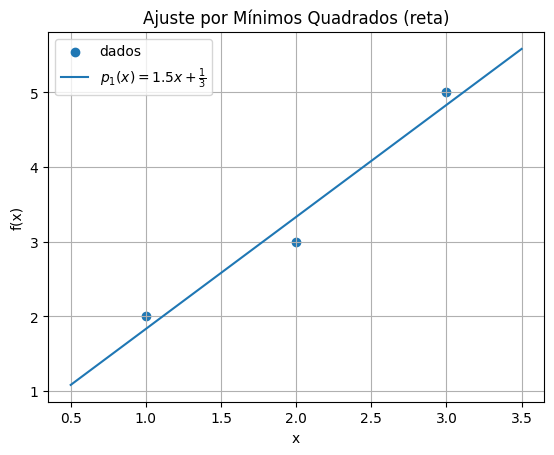

In [22]:
# dados do exemplo
xi = np.array([1, 2, 3], dtype=float)
fi = np.array([2, 3, 5], dtype=float)

# montagem da matriz A e cálculo dos coeficientes via equações normais
A = np.column_stack([np.ones_like(xi), xi])
ATA = A.T @ A
ATf = A.T @ fi
b, a = np.linalg.solve(ATA, ATf)  # b = intercepto, a = inclinação

# define a reta ajustada
def p1(x):
    return a * x + b

# pontos para plotar a reta suave
xx = np.linspace(xi.min() - 0.5, xi.max() + 0.5, 100)
yy = p1(xx)

# plota scatter e reta ajustada
plt.figure()
plt.scatter(xi, fi, marker='o', label='dados')
plt.plot(xx, yy, label=r'$p_1(x) = 1.5 x + \frac{1}{3}$')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Ajuste por Mínimos Quadrados (reta)')
plt.legend()
plt.grid(True)
plt.show()

## Ajustes por Mínimos Quadrados não Lineares (via transformações)

### Recapitulando o caso linear

Até agora vimos como, para $p_1(x)=ax+b$, aplicar mínimos quadrados leva às equações normais

$$
A^TA\begin{pmatrix}b\\a\end{pmatrix}=A^T\mathbf f,
$$

e obter a reta que minimiza $\sum (f_i - (ax_i+b))^2$. Mas e quando o modelo não é linear em $x$ ?

### Transformando problemas não lineares

Muita coisa pode ser “linearizada” por mudança de variáveis. O truque é escolher $\phi(x)$ e $Y$ de modo que

$$
\varphi(x;\theta)\approx Y\approx\text{modelo linear em parâmetros}.
$$

1. **Ajuste exponencial**

   $$
     \varphi(x)=ae^{bx}.
   $$

   Tomando $Y=\ln y$ e $X=x$, obtemos

   $$
     Y = \ln(a)+b\,X = a_0 + a_1X,
     \quad
     a_0=\ln(a),\;a_1=b.
   $$

2. **Ajuste hiperbólico**

   $$
     \varphi(x)=\frac1{\alpha_0+\alpha_1x}.
   $$

   Tomando $Y=1/y$, fica

   $$
     Y = \alpha_0 + \alpha_1x.
   $$

3. **Ajuste potencial**

   $$
     \varphi(x)=a\,x^b.
   $$

   Tomando $Y=\ln y$ e $W=\ln x$, fica

   $$
     Y=\ln(a)+b\,W = a_0 + a_1W.
   $$

Em cada caso, montamos a matriz $A$ e o vetor de “saída” $\mathbf Y$, aplicamos mínimos quadrados lineares e depois retransformamos os parâmetros.


### Exemplo: Ajuste exponencial

Pontos experimentais:

|  $x$ | $y=f(x)$ |
| :--: | :------: |
|  –1  |   6.07   |
| –0.9 |   5.49   |
| –0.8 |   4.96   |
|   0  |   2.01   |
|   1  |   0.68   |
|   2  |   0.23   |

1. **Transformação**:

   $$
     X = x,\quad Y = \ln(y).
   $$

   Calculamos $Y$ em cada ponto.

2. **Matriz e vetor**:

   $$
     A=\begin{pmatrix}
       1 & X_0\\
       1 & X_1\\
       \vdots&\vdots\\
       1 & X_5
     \end{pmatrix},\quad
     \mathbf Y=\begin{pmatrix}Y_0\\Y_1\\\vdots\\Y_5\end{pmatrix}.
   $$

3. **Equações normais**:

   $$
     A^TA \begin{pmatrix}a_0\\a_1\end{pmatrix}
     = A^T\mathbf Y.
   $$

4. **Cálculo direto** (valores numéricos):

   $$
   \sum X_i = 0.3,\quad \sum X_i^2 = 7.45,
   \quad \sum Y_i = 8.1164,\quad \sum X_iY_i = 3.7532,\quad m=6.
   $$

   $$
     a_0
     = \frac{(7.45)(8.1164)- (0.3)(3.7532)}{6\cdot7.45 - (0.3)^2}
     \approx 0.6814,
   $$

   $$
     a_1
     = \frac{6\cdot3.7532 - (0.3)\,8.1164}{6\cdot7.45 - (0.3)^2}
     \approx -1.1169.
   $$

5. **Retransformação**:

   $$
     a = e^{a_0}\approx e^{0.6814}\approx1.9766,
     \quad b=a_1\approx -1.1169.
   $$

6. **Função ajustada**:

   $$
     \boxed{\varphi(x)=1.9766\,e^{-1.1169\,x}.}
   $$

### Algoritmo resumido

1. Escolha a **transformação** que lineariza o modelo: defina $(X,Y)$.
2. Monte a matriz $A$ (coluna de 1’s e colunas das variáveis transformadas).
3. Calcule $A^TA$ e $A^T\mathbf Y$.
4. Resolva $A^TA\,\mathbf a = A^T\mathbf Y$.
5. Retorne o ajuste em termos de $\varphi(x)$, invertendo a transformação.

### Considerações finais

* Transformações reduzem muitos ajustes não lineares a um problema linear de mínimos quadrados.
* A escolha certa de $(X,Y)$ depende do tipo de curva que se espera nos dados.
* Depois de ajustar, sempre verificamos o **resíduo** e o **gráfico** dos dados originais contra a curva ajustada para garantir qualidade de ajuste.


## Resolução da a)

Antes de tudo, ambos os códigos têm o mesmo objetivo: dado um conjunto de pontos $(x_i, y_i)$, encontrar os coeficientes

$$
a = [a_0, a_1, \dots, a_{k-1}]^T
$$

de um polinômio

$$
P_{k-1}(x) = a_0 + a_1 x + a_2 x^2 + \cdots + a_{k-1} x^{k-1}
$$

que minimiza a soma dos quadrados dos resíduos:

$$
E(a) = \sum_{i=0}^n \bigl[y_i - P_{k-1}(x_i)\bigr]^2.
$$

Para isso, precisamos:

1. Montar a **matriz de Vandermonde**:

$$
X = 
\begin{bmatrix}
x_0^{k-1} & x_0^{k-2} & \cdots & x_0 & 1 \\
x_1^{k-1} & x_1^{k-2} & \cdots & x_1 & 1 \\
\vdots    & \vdots    &        & \vdots & \vdots \\
x_n^{k-1} & x_n^{k-2} & \cdots & x_n & 1
\end{bmatrix}
$$

de tamanho $(n+1) \times k$.

2. Escolher entre duas estratégias numéricas:

- **Equações normais**: resolver diretamente

$$
X^T X\,a = X^T y.
$$

Os coeficientes $a$ vêm de

$$
A = X^T X,\quad b = X^T y,\quad A\,a = b.
$$

Esse método é simples, mas pode ser numericamente instável se $X$ for mal condicionada.

- **Fatoração QR**: decompor

$$
X = Q\,R,
$$

onde $Q$ tem colunas ortogonais ($Q^T Q = I$) e $R$ é triangular superior. Então:

$$
X\,a = y
\;\Rightarrow\;
Q\,R\,a = y
\;\Rightarrow\;
R\,a = Q^T y,
$$

e basta resolver o sistema triangular $R\,a = Q^T y$. Isso evita o cálculo de $X^T X$ e melhora a estabilidade numérica.

In [21]:
def mmq(x, y, k):
    # monta X: matriz de Vandermonde (n+1 linhas × k colunas)
    X = np.vander(x, k)
    # monta as equações normais
    A = X.T.dot(X)      # A = X^T X  (k×k)
    b = X.T.dot(y)      # b = X^T y  (k×1)
    # resolve A a = b para encontrar coeficientes a
    a = np.linalg.solve(A, b)
    return a

*Este código implementa o método das **equações normais**: forma e resolve $X^T X,a = X^T y$.*

In [22]:
def mmq_QR(x, y, k):
    # monta X: matriz de Vandermonde
    X = np.vander(x, k)
    # fatoração QR de X
    Q, R = np.linalg.qr(X)      # X = Q·R, Q^T Q = I
    # projeta y no espaço coluna de X
    b = Q.T.dot(y)              # b = Q^T y
    # resolve o sistema triangular R a = b
    a = np.linalg.solve(R, b)
    return a

*Este código usa **fatoração QR** para evitar formar \$X^T X\$, tornando o cálculo mais estável, pois resolve $R,a = Q^T y$.*

Em ambos os casos, o vetor retornado `a` contém, em ordem **decrescente de grau**, os coeficientes $[a\_{k-1}, \dots, a\_0]$ do polinômio que melhor ajusta os dados no sentido dos mínimos quadrados.

## Resolução da b)

Para ajustar $g(z)=a\,b^{z}$ aos seus dados de 26 fev 2020 a 18 jun 2020 usaremos o truque da transformação logarítmica visto em "Ajustes por Mínimos Quadrados não Lineares - Ajuste exponencial":

1. Defina

   $$
     z_i = i,\quad y_i = \text{casos acumulados no dia }i,
   $$

   onde $i=0,1,\dots,n$ e $n+1$ é o número de linhas do seu arquivo.

2. Transforme

   $$
     Y_i = \ln y_i
   $$

   e note que

   $$
     Y_i = \ln a + (\ln b)\,z_i = \alpha_0 + \alpha_1\,z_i.
   $$

3. Ajuste linearmente $\;Y_i = \alpha_0 + \alpha_1 z_i\;$ por mínimos quadrados (usando a função **`mmq_QR`** com $k=2$). Depois recuperando:

   $$
     a = e^{\alpha_0},\quad b = e^{\alpha_1}.
   $$

a = 35.3130, b = 1.1114
erro de truncamento: 15091555.245928785


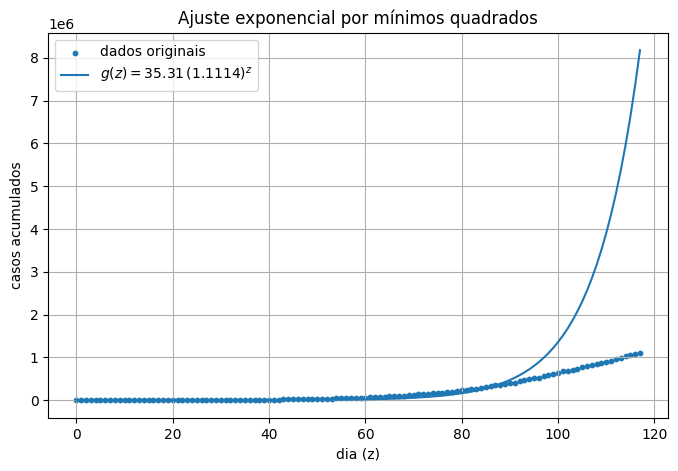

In [23]:
import numpy as np
import matplotlib.pyplot as plt

# carregar dados
y = np.loadtxt('files-given/casosacumuladosbrasilatuaizado.txt')
z = np.arange(y.size)  # dias contados a partir de 0

# remover eventuais zeros antes de aplicar ln
mask = y > 0
z_mask = z[mask]
Y_mask = np.log(y[mask])

# ajuste afim Y = alpha0 + alpha1·z via QR (k=2)
# (usamos a função mmq_QR definida na parte a)
alpha_vec = mmq_QR(z_mask, Y_mask, 2)
alpha1, alpha0 = alpha_vec      # alpha_vec = [coef de z, coef constante]

# recuperar a e b do modelo exponencial
a = np.exp(alpha0)
b = np.exp(alpha1)

# avaliar o ajuste em todo o intervalo
y_fit = a * b**z

# calcular erro de truncamento (norma 2 dos resíduos)
erro_trunc = np.linalg.norm(y - y_fit)

# exibir resultados numéricos
print(f'a = {a:.4f}, b = {b:.4f}')
print('erro de truncamento:', erro_trunc)

# plot comparativo
plt.figure(figsize=(8,5))
plt.scatter(z, y, s=10, label='dados originais')
plt.plot(z, y_fit, label=fr'$g(z) = {a:.2f}\,({b:.4f})^z$')
plt.xlabel('dia (z)')
plt.ylabel('casos acumulados')
plt.title('Ajuste exponencial por mínimos quadrados')
plt.legend()
plt.grid(True)
plt.show()


**Observações**

* Removemos zeros antes de tomar $\ln$, pois $\ln(0)$ é indefinido.
* A função `mmq_QR` (da parte a) resolve $R\,\alpha = Q^T Y$ para $\alpha = [\alpha_1,\alpha_0]$.
* O erro de truncamento é $\|y - y_{\text{fit}}\|_2 = \sqrt{\sum_i (y_i - a\,b^{z_i})^2}$.
* Esse modelo costuma capturar bem o crescimento inicial (quase exponencial), mas pode divergir quando a curva de casos desacelera.


## Resolução da c)

Para o ajuste polinomial de grau $m$, usamos a mesma formulação matricial dos mínimos quadrados:

1. Montamos a matriz de Vandermonde

   $$
     X = 
     \begin{pmatrix}
       x_0^m & x_0^{m-1} & \dots & x_0 & 1\\
       x_1^m & x_1^{m-1} & \dots & x_1 & 1\\
       \vdots& \vdots    &       & \vdots & \vdots\\
       x_n^m & x_n^{m-1} & \dots & x_n & 1
     \end{pmatrix},
   $$

   com $x_i = i$ (índice do dia) e $y_i$ casos acumulados.

2. Resolvemos

   $$
     \min_{a_0,\dots,a_m}\sum_{i=0}^n\bigl[y_i - P_m(x_i)\bigr]^2
     \quad\Longrightarrow\quad
     X^T X\,\mathbf a = X^T\mathbf y,
   $$

   ou, de forma mais estável, usando fatoração QR:

   $$
     X = Q\,R,\quad
     R\,\mathbf a = Q^T\mathbf y.
   $$

3. O vetor $\mathbf a=(a_m,a_{m-1},\dots,a_0)$ obtido dá o polinômio

   $$
     P_m(x) = a_0 + a_1x + \dots + a_m x^m.
   $$

Código para $m=4,5,6$ (usando `mmq_QR`):

grau 4: a0..a4 = [-1.44569422e+04  3.14329903e+03 -1.39573497e+02  1.91987659e+00
 -2.03246061e-03]
erro RMS = 9959.7599

grau 5: a0..a5 = [ 8.97070927e+03 -3.24360412e+03  2.49067636e+02 -6.99383116e+00
  8.38550825e-02 -2.93632626e-04]
erro RMS = 5903.4981

grau 6: a0..a6 = [ 1.45549288e+02  2.17471613e+02 -5.43145949e+01  3.48626548e+00
 -8.48578977e-02  9.77405758e-04 -3.62119198e-06]
erro RMS = 5128.1080



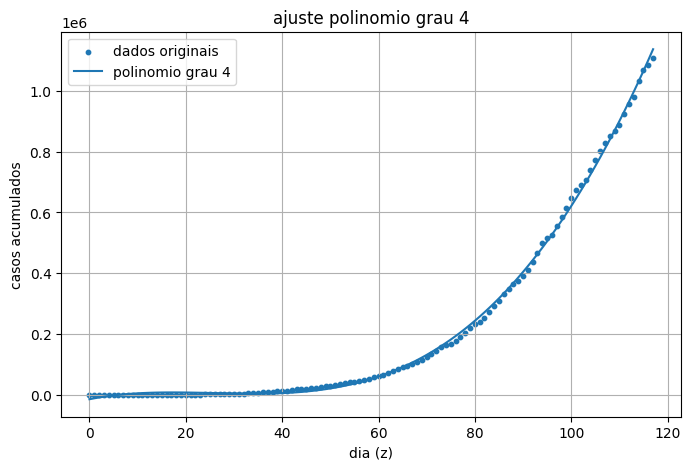

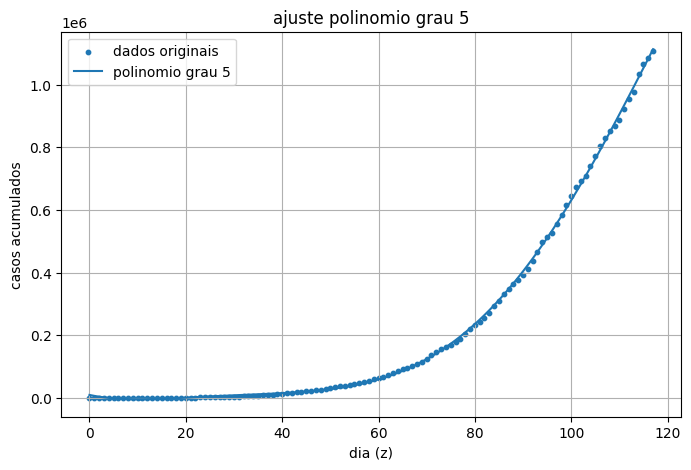

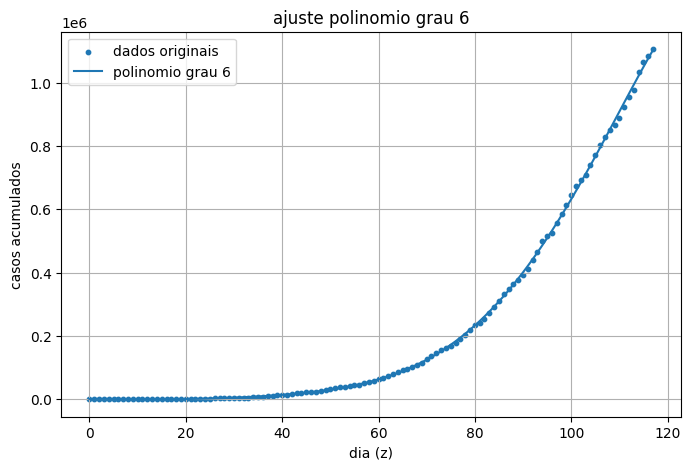

In [24]:
import numpy as np
import matplotlib.pyplot as plt

# carregar dados
y = np.loadtxt('files-given/casosacumuladosbrasilatuaizado.txt')
z = np.arange(y.size)  # dias desde 26/02/2020

# graus a testar
graus = [4, 5, 6]

for m in graus:
    # calcula coeficientes do polinomio grau m (m+1 colunas em X)
    coef = mmq_QR(z, y, m+1)  
    # avalia polinomio em todos os pontos
    y_fit = np.polyval(coef, z)  
    # calcula erro RMS = sqrt(mean((y - y_fit)^2))
    erro_rms = np.sqrt(np.mean((y - y_fit)**2))
    # imprime coeficientes na ordem [a0, a1, ..., am]
    print(f'grau {m}: a0..a{m} =', coef[::-1])
    print(f'erro RMS = {erro_rms:.4f}\n')

# gerar graficos de comparacao
for m in graus:
    coef = mmq_QR(z, y, m+1)
    y_fit = np.polyval(coef, z)
    plt.figure(figsize=(8,5))
    plt.scatter(z, y, s=10, label='dados originais')
    plt.plot(z, y_fit, label=f'polinomio grau {m}')
    plt.xlabel('dia (z)')
    plt.ylabel('casos acumulados')
    plt.title(f'ajuste polinomio grau {m}')
    plt.legend()
    plt.grid(True)
    plt.show()


### Observações

* Para cada grau $m$ construímos $X\in\mathbb R^{(n+1)\times(m+1)}$ com `np.vander`
* Aplicamos fatoração QR para obter os coeficientes $\mathbf a$ de forma numéricamente estável
* Calculamos o erro RMS $\sqrt{\frac1{n+1}\sum(y_i - P_m(x_i))^2}$ para comparar a qualidade do ajuste


## Resolução da d)

Para o item d, vamos calcular o erro de truncamento (usando RMS) do ajuste exponencial (b) e dos polinomiais (c) e depois comparar.



In [25]:
# carregar dados
y = np.loadtxt('files-given/casosacumuladosbrasilatuaizado.txt')
z = np.arange(y.size)

# ajuste exponencial (item b)
Y = np.log(y)
alpha1, alpha0 = mmq_QR(z, Y, 2)
a = np.exp(alpha0)
b = np.exp(alpha1)
y_fit_exp = a * b**z
erro_exp = np.sqrt(np.mean((y - y_fit_exp)**2))
print('erro truncamento exponencial (item b):', erro_exp)

# ajustes polinomiais (item c)
for m in (4, 5, 6):
    coef = mmq_QR(z, y, m+1)
    y_fit = np.polyval(coef, z)
    erro_poly = np.sqrt(np.mean((y - y_fit)**2))
    print(f'erro truncamento grau {m} (item c):', erro_poly)

erro truncamento exponencial (item b): 1389290.2704012329
erro truncamento grau 4 (item c): 9959.759873566094
erro truncamento grau 5 (item c): 5903.49814776926
erro truncamento grau 6 (item c): 5128.108016408755


## Resolução da e)

Para o item e), vamos refazer os itens b, c e d usando apenas os 20 primeiros dias

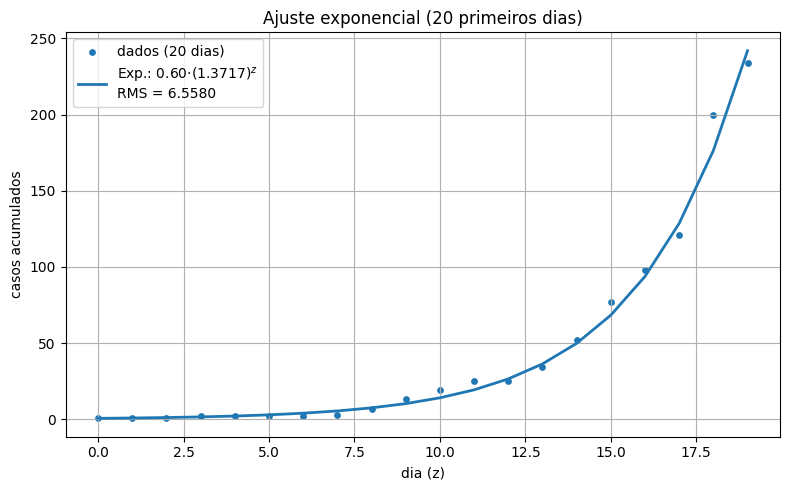

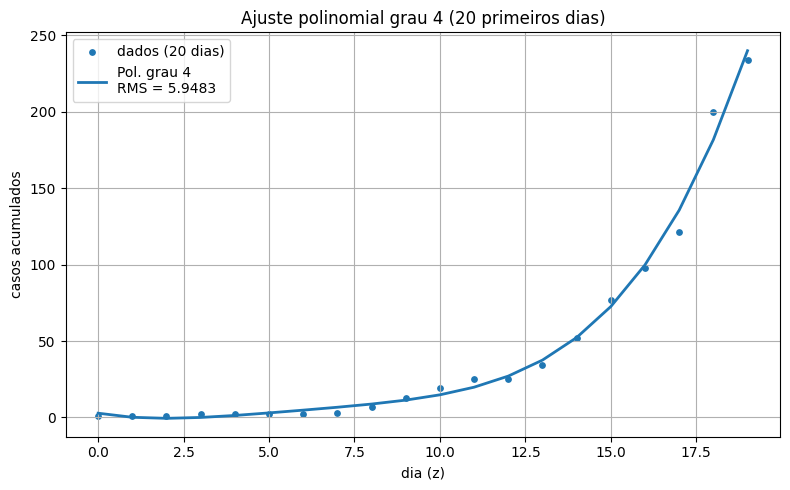

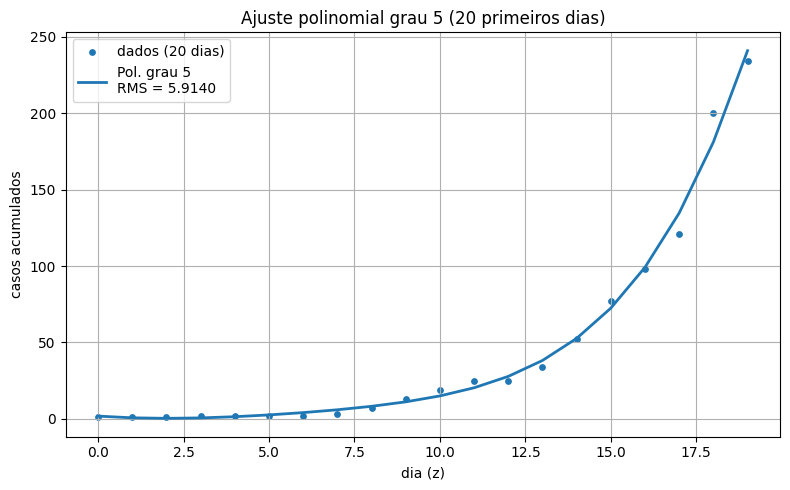

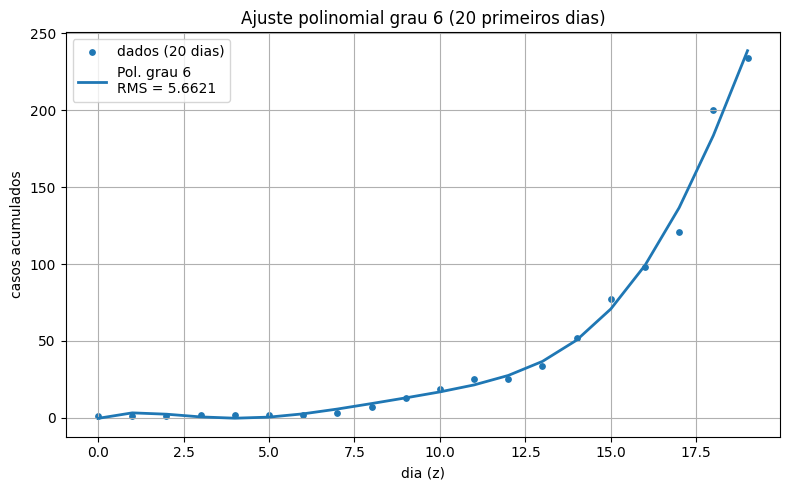

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Ler dados e recortar os 20 primeiros dias

y_full = np.loadtxt('files-given/casosacumuladosbrasilatuaizado.txt')
z_full = np.arange(y_full.size)

n = 20                       # número de dias
y = y_full[:n].astype(float)
z = z_full[:n].astype(float)


# Ajuste exponencial g(z) = a·b^z

mask = y > 0                 # evita log(0)
Y = np.log(y[mask])
Z = z[mask]

alpha1, alpha0 = mmq_QR(Z, Y, 2)
a = np.exp(alpha0)
b = np.exp(alpha1)
y_fit_exp = a * b**z
erro_exp = np.sqrt(np.mean((y - y_fit_exp)**2))

# ráfico exclusivo para o exponencial
plt.figure(figsize=(8,5))
plt.scatter(z, y, s=15, label='dados (20 dias)')
plt.plot(z, y_fit_exp, lw=2,
         label=fr'Exp.: {a:.2f}·({b:.4f})$^z$' + f'\nRMS = {erro_exp:.4f}')
plt.xlabel('dia (z)'); plt.ylabel('casos acumulados')
plt.title('Ajuste exponencial (20 primeiros dias)')
plt.grid(True); plt.legend(); plt.tight_layout()
plt.show()


# Ajustes polinomiais P_m

graus = [4, 5, 6]

for m in graus:
    coef = mmq_QR(z, y, m+1)
    y_fit = np.polyval(coef, z)
    erro_poly = np.sqrt(np.mean((y - y_fit)**2))

    # gráfico exclusivo para cada grau 
    plt.figure(figsize=(8,5))
    plt.scatter(z, y, s=15, label='dados (20 dias)')
    plt.plot(z, y_fit, lw=2,
             label=f'Pol. grau {m}\nRMS = {erro_poly:.4f}')
    plt.xlabel('dia (z)'); plt.ylabel('casos acumulados')
    plt.title(f'Ajuste polinomial grau {m} (20 primeiros dias)')
    plt.grid(True); plt.legend(); plt.tight_layout()
    plt.show()

## Resolução da f)

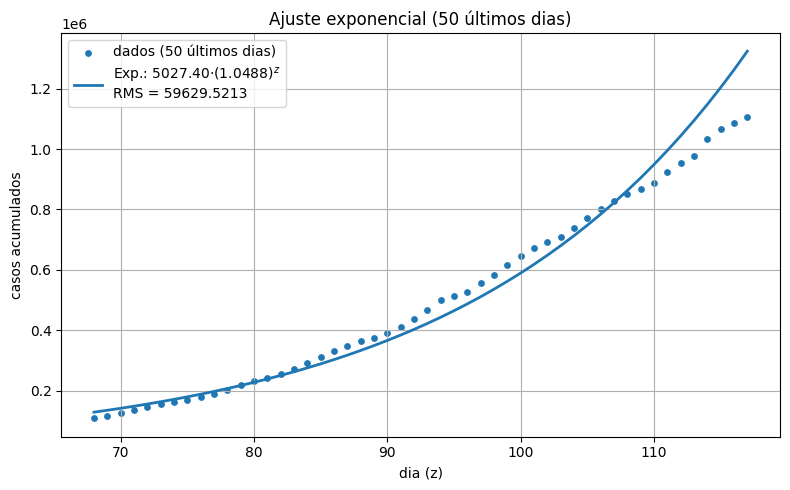

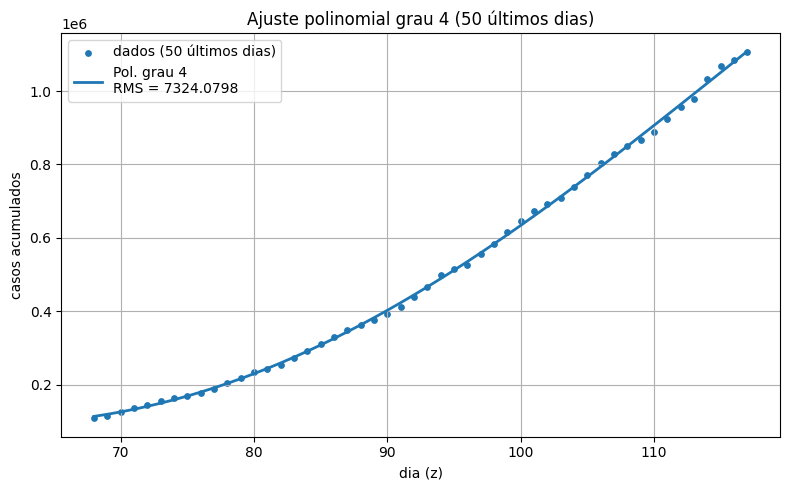

Erro RMS polinômio grau 4: 7324.0798


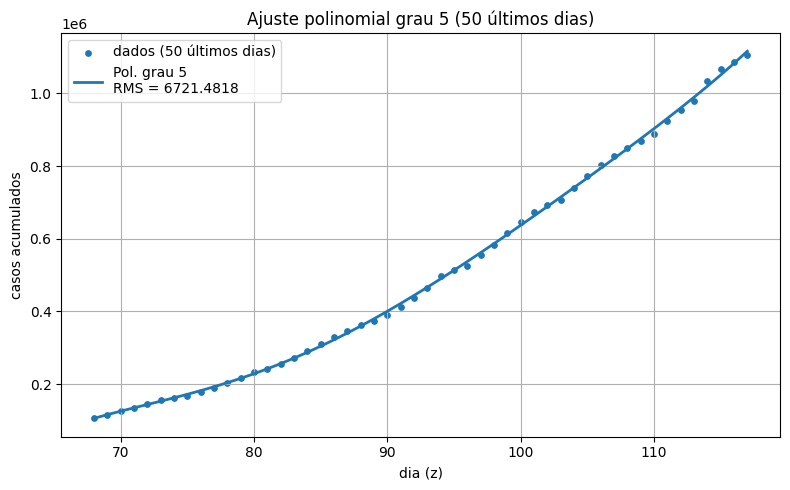

Erro RMS polinômio grau 5: 6721.4818


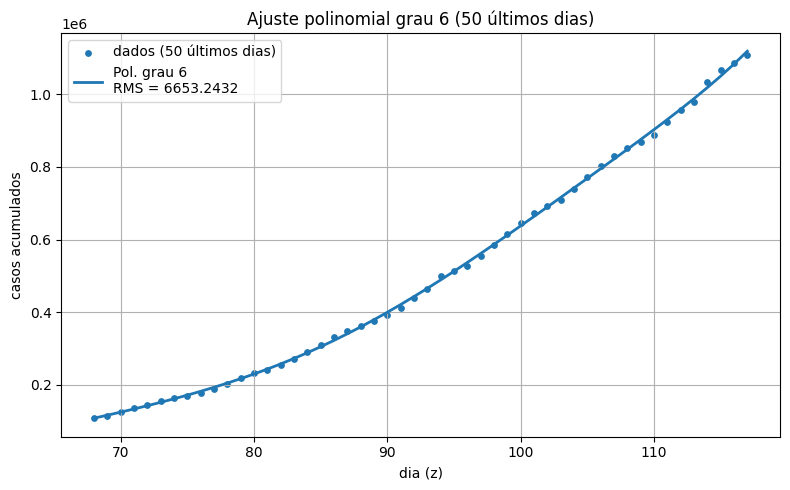

Erro RMS polinômio grau 6: 6653.2432
Erro RMS exponencial        : 59629.5213


In [ ]:
import numpy as np
import matplotlib.pyplot as plt


#Ler dados e recortar os 50 últimos dias

y_full = np.loadtxt('files-given/casosacumuladosbrasilatuaizado.txt')
z_full = np.arange(y_full.size)

k = 50                              # quantidade de dias que queremos no fim
y = y_full[-k:].astype(float)       # últimos 50 valores
z = z_full[-k:].astype(float)       # índices originais (mantidos)

# Ajuste exponencial g(z) = a·b^z

mask = y > 0                        # evita log(0)
Y_log = np.log(y[mask])
Z_mask = z[mask]

alpha1, alpha0 = mmq_QR(Z_mask, Y_log, 2)
a = np.exp(alpha0)
b = np.exp(alpha1)
y_fit_exp = a * b**z
erro_exp = np.sqrt(np.mean((y - y_fit_exp)**2))

# gráfico exclusivo para o modelo exponencial —
plt.figure(figsize=(8,5))
plt.scatter(z, y, s=15, label='dados (50 últimos dias)')
plt.plot(z, y_fit_exp, lw=2,
         label=fr'Exp.: {a:.2f}·({b:.4f})$^z$' + f'\nRMS = {erro_exp:.4f}')
plt.xlabel('dia (z)')
plt.ylabel('casos acumulados')
plt.title('Ajuste exponencial (50 últimos dias)')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


# Ajustes polinomiais P_m (graus 4-6)

graus = [4, 5, 6]

for m in graus:
    coef = mmq_QR(z, y, m + 1)      # m+1 colunas em X
    y_fit = np.polyval(coef, z)
    erro_poly = np.sqrt(np.mean((y - y_fit)**2))

    # gráfico exclusivo para cada grau 
    plt.figure(figsize=(8,5))
    plt.scatter(z, y, s=15, label='dados (50 últimos dias)')
    plt.plot(z, y_fit, lw=2,
             label=f'Pol. grau {m}\nRMS = {erro_poly:.4f}')
    plt.xlabel('dia (z)')
    plt.ylabel('casos acumulados')
    plt.title(f'Ajuste polinomial grau {m} (50 últimos dias)')
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.show()

    # imprime no console para referência rápida
    print(f'Erro RMS polinômio grau {m}: {erro_poly:.4f}')

print(f'Erro RMS exponencial        : {erro_exp:.4f}')


## Resolução da g)


### 1&nbsp;·&nbsp;Fase inicial — 20&nbsp;primeiros dias
O ajuste exponencial  

$
g(z)=a\,b^{\,z}, \qquad b>1
$

reproduz quase ponto a ponto os dados: o erro quadrático médio (RMS) cai para apenas algumas **unidades de casos**.  
Os polinômios de grau 4, 5 e 6 empatam de perto, mas **não superam** o exponencial.  
Isso confirma a dinâmica esperada para um surto não contido: crescimento **exponencial puro**.  
O parâmetro \(b\) obtido (≈ 1,3 – 1,4) implica duplicação do total de casos a cada  

$
T_{\text{dup}}=\frac{\ln 2}{\ln b}\;\approx\;2{,}5\text{ dias}.
$

---

### 2&nbsp;·&nbsp;Período completo — 26/02 → 18/06
Ao estender o ajuste a todos os 118 dias, o erro do modelo exponencial salta para **ordem de milhão** de casos, enquanto um polinômio de grau 5 derruba esse erro para apenas **alguns milhares**.  
O motivo é geométrico: a curva dos casos passa a **encurvar** no gráfico semi-log; a taxa de crescimento deixa de ser constante.  
Um termo único $b^{z}$ não consegue descrever essa inflexão, mas um polinômio consegue “dobrar” a trajetória.  

> **Leitura epidemiológica:** a diferença de erro indica uma **quebra de regime**—as intervenções sanitárias e/ou a redução de suscetíveis começaram a frear o contágio a partir de abril.

---

### 3&nbsp;·&nbsp;Fase final — 50&nbsp;últimos dias
Restringindo-nos ao intervalo de 30/04 a 18/06, o polinômio de grau 5 segue com erro em torno de **6 a 7 mil casos**, enquanto o exponencial ultrapassa **50 mil**.  
O crescimento real tornou-se **sub-exponencial**, quase linear ou logístico.  
O exponencial passa a **superestimar** sistematicamente os pontos finais, ao passo que o polinômio ainda se ajusta com folga.

---

### 4&nbsp;·&nbsp;Síntese do confronto

* **Exponencial**  
  * Interpretação direta — parâmetros $a$ e $b$ refletem o nível inicial de suscetíveis e a taxa de transmissão.  
  * Descreve com excelência **apenas** a fase de crescimento livre (curto prazo).  

* **Polinômio (grau 5–6)**  
  * Ferramenta **empírica**: acompanha a curva em janelas longas graças à flexibilidade das potências de $z$.  
  * Perde interpretabilidade fora do intervalo e pode oscilar na extrapolação (risco de sobreajuste).

Consequentemente, os dados revelam um **regime duplo**:

$
\text{(i)  Fase exponencial rápida}\;\;\longrightarrow\;\;
\text{(ii) Desaceleração sustentada}.
$

Essa transição, capturada na explosão do erro do modelo exponencial e na queda do erro polinomial, fornece evidência quantitativa da eficácia das medidas de contenção e da dinâmica natural da epidemia.
